In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

# Visualization of data

## Overview visualization

In [2]:
games = pd.read_pickle('datasets/cleaned_steam_games.pkl')
games.head()

,name,all_reviews,recommend,release_date,release_date_epoch_days,developer,publisher,popular_tags,languages,genre,...,discount_percentage,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy
0,DOOM,92,True,2016-05-12,16933,id Software,"Bethesda Softworks,Bethesda Softworks","[FPS, Gore, Action, Demons, Shooter, First-Per...","[English, French, Italian, German, Spanish - S...",[Action],...,25.012506,1,0,0,0,0,0,0,0,0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,False,2017-12-21,17521,PUBG Corporation,"PUBG Corporation,PUBG Corporation","[Survival, Shooter, Multiplayer, Battle Royale...","[English, Korean, Simplified Chinese, French, ...","[Action, Adventure, Massively Multiplayer]",...,0.000000,1,1,0,1,0,0,0,0,0
2,BATTLETECH,71,True,2018-04-24,17645,Harebrained Schemes,"Paradox Interactive,Paradox Interactive","[Mechs, Strategy, Turn-Based, Turn-Based Tacti...","[English, French, German, Russian]","[Action, Adventure, Strategy]",...,0.000000,1,1,0,0,0,0,0,0,1
3,DayZ,61,False,2018-12-13,17878,Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","[Survival, Zombies, Open World, Multiplayer, P...","[English, French, Italian, German, Spanish - S...","[Action, Adventure, Massively Multiplayer]",...,0.000000,1,1,0,1,0,0,0,0,0
4,EVE Online,74,True,2003-05-06,12178,CCP,"CCP,CCP","[Space, Massively Multiplayer, Sci-fi, Sandbox...","[English, German, Russian, French]","[Action, Massively Multiplayer, RPG, Strategy]",...,0.000000,1,0,0,1,1,0,0,0,1


In [3]:
print("Dimension of games: ", games.shape)

Dimension of games:  (11620, 23)


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11620 entries, 0 to 40811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype           
---  ------                       --------------  -----           
 0   name                         11620 non-null  object          
 1   all_reviews                  11620 non-null  int64           
 2   recommend                    11620 non-null  bool            
 3   release_date                 11620 non-null  datetime64[ns]  
 4   release_date_epoch_days      11620 non-null  int64           
 5   developer                    11620 non-null  object          
 6   publisher                    11620 non-null  object          
 7   popular_tags                 11620 non-null  object          
 8   languages                    11620 non-null  object          
 9   genre                        11620 non-null  object          
 10  mature_content               11620 non-null  bool            
 11  original_price 

In [6]:
games.dtypes

name                                     object
all_reviews                               int64
recommend                                  bool
release_date                     datetime64[ns]
release_date_epoch_days                   int64
developer                                object
publisher                                object
popular_tags                             object
languages                                object
genre                                    object
mature_content                             bool
original_price                          float64
discount_price                          float64
discount_percentage                     float64
genre_Action                   Sparse[int32, 0]
genre_Adventure                Sparse[int32, 0]
genre_Casual                   Sparse[int32, 0]
genre_Massively Multiplayer    Sparse[int32, 0]
genre_RPG                      Sparse[int32, 0]
genre_Racing                   Sparse[int32, 0]
genre_Simulation               Sparse[in

# Responses
- The main response variable is `recommend`
- `all_reviews` is shown merely for visualization purpose.  

## All reviews

In [94]:
# Describe all reviews
games['all_reviews'].describe()

count    11620.000000
mean        73.634079
std         18.682198
min          0.000000
25%         63.000000
50%         77.000000
75%         88.000000
max        100.000000
Name: all_reviews, dtype: float64

<AxesSubplot:>

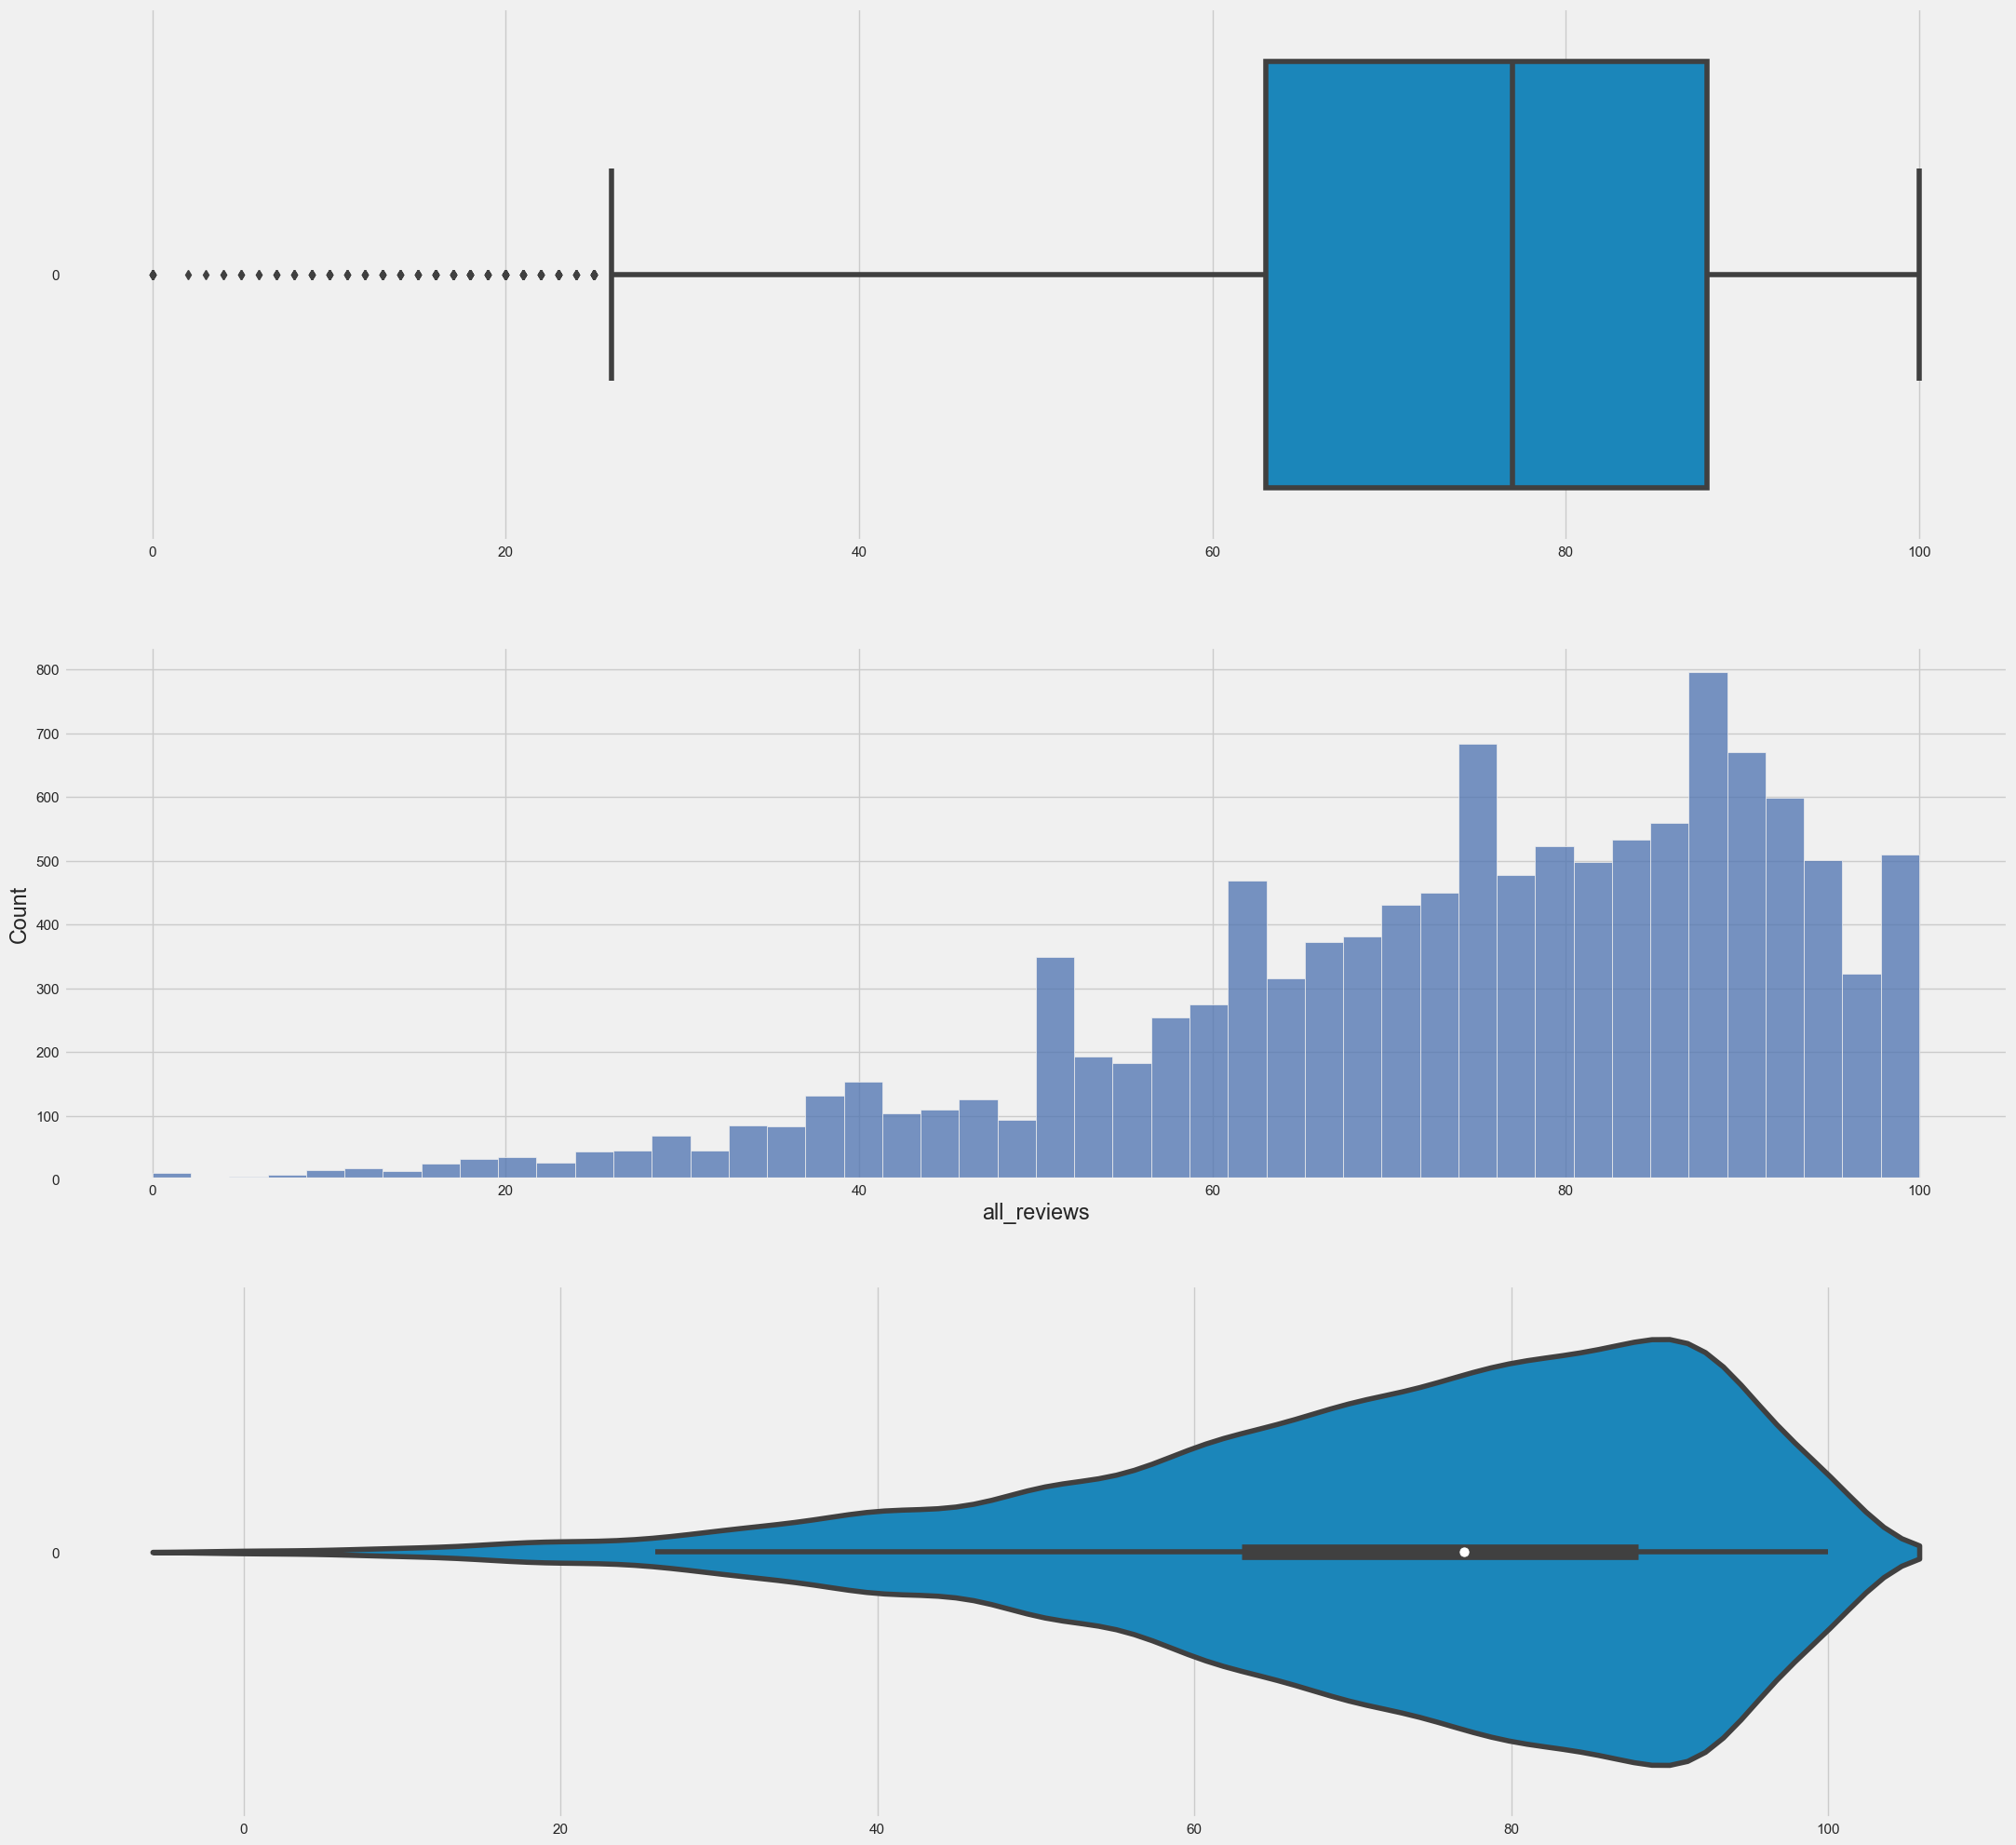

In [95]:
# Plots for all reviews
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = games['all_reviews'], orient = "h", ax = axes[0])
sb.histplot(data = games['all_reviews'],ax = axes[1])
sb.violinplot(data = games['all_reviews'], orient = "h", ax = axes[2])

Steam's game rating system designates games with a review score of `70 or above` as "Mostly Positive" or above; thus, we classify games with a rating of 70 or higher as good games, i.e., `recommend = True`, otherwise recommend = False.

## Recommend

<Figure size 1200x300 with 0 Axes>

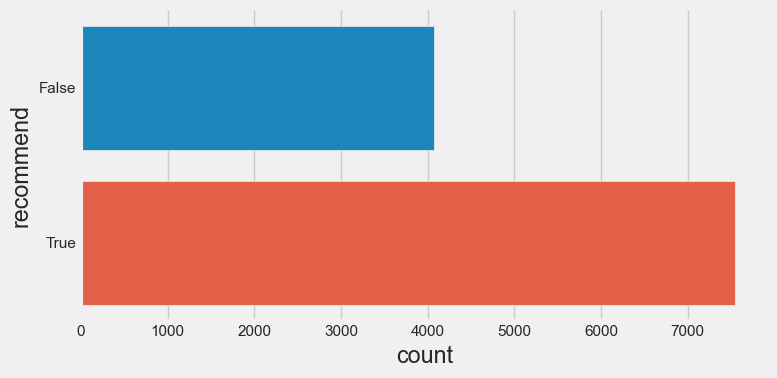

In [17]:
# Recommend's distribution
f = plt.figure(figsize=(12, 3))
sb.catplot(y = "recommend", data = games, kind = "count", height = 4, aspect = 2) 

# Numerical data

In [42]:
# Numerical data
numericalgames = games[['all_reviews', 'original_price', 'discount_price', 'discount_percentage']]
numericalgames.head()


,all_reviews,original_price,discount_price,discount_percentage
0,92,19.99,14.99,25.012506
1,49,29.99,29.99,0.000000
2,71,39.99,39.99,0.000000
3,61,44.99,44.99,0.000000
4,74,0.00,0.00,0.000000


Text(0.5, 0, 'discount_percentage')

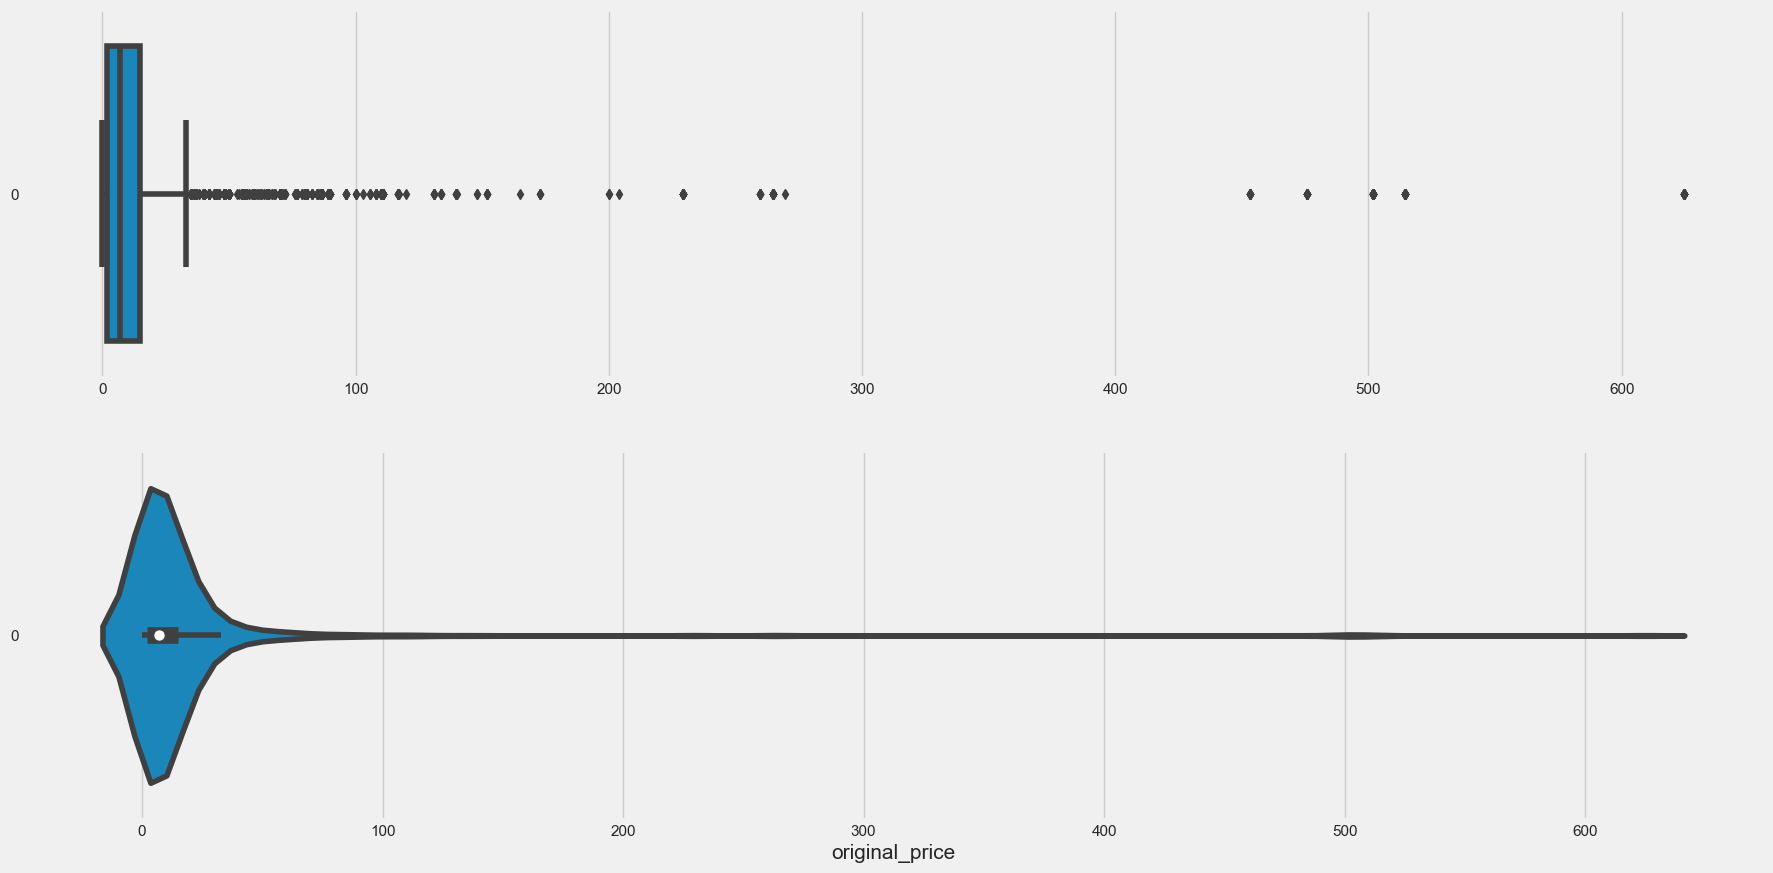

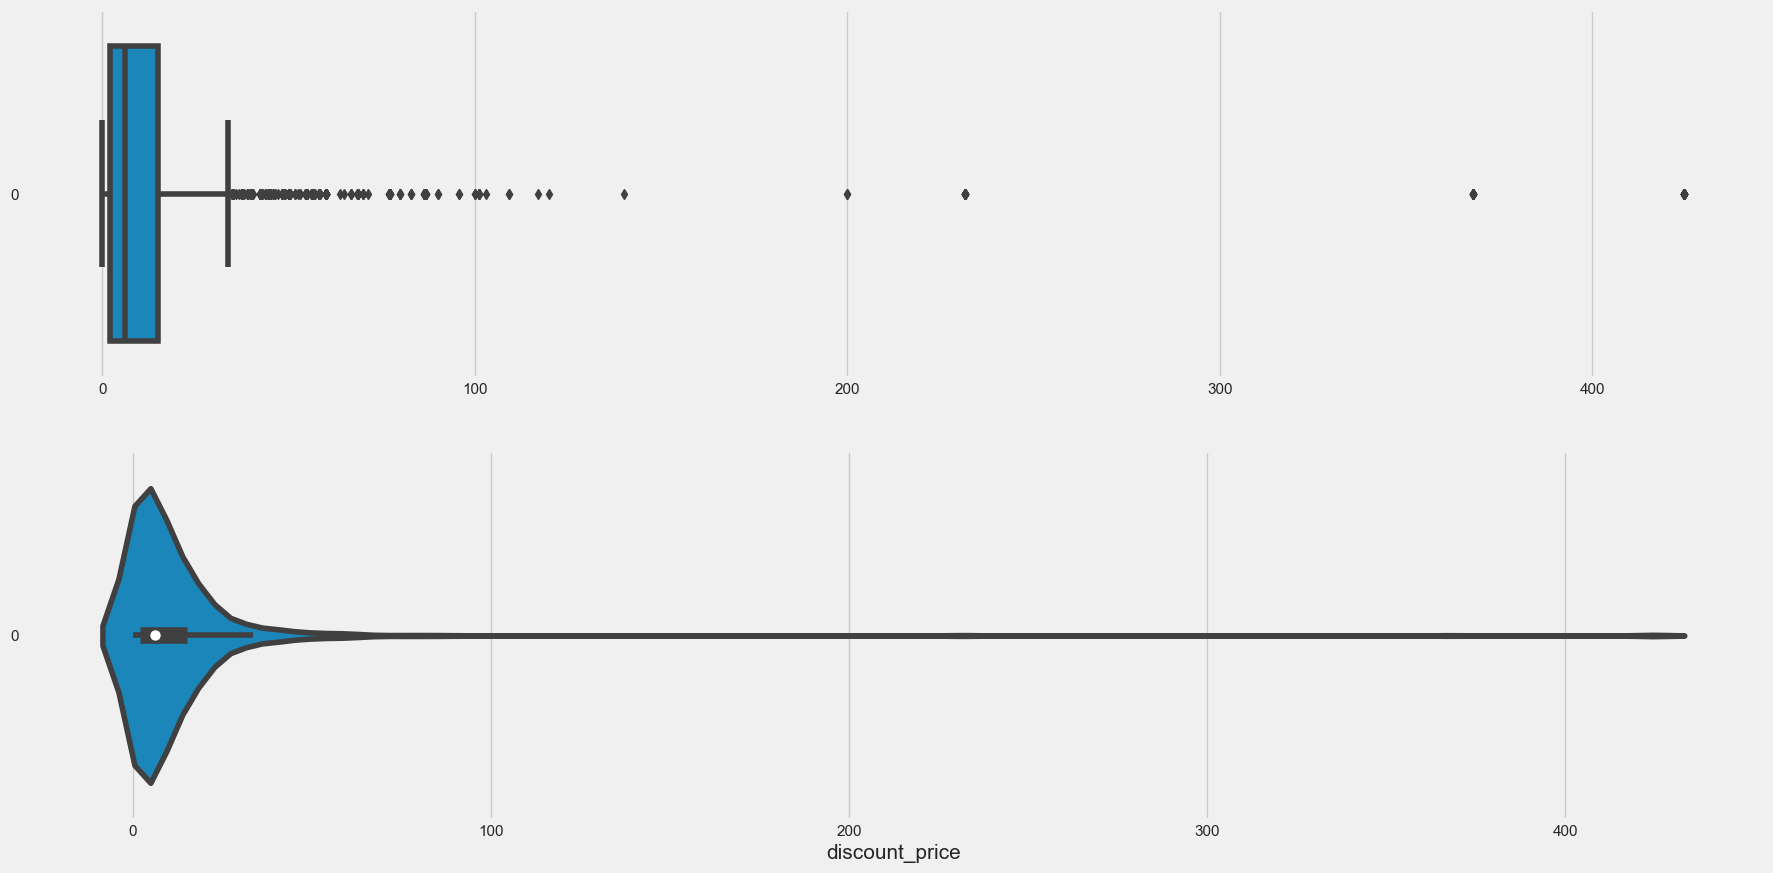

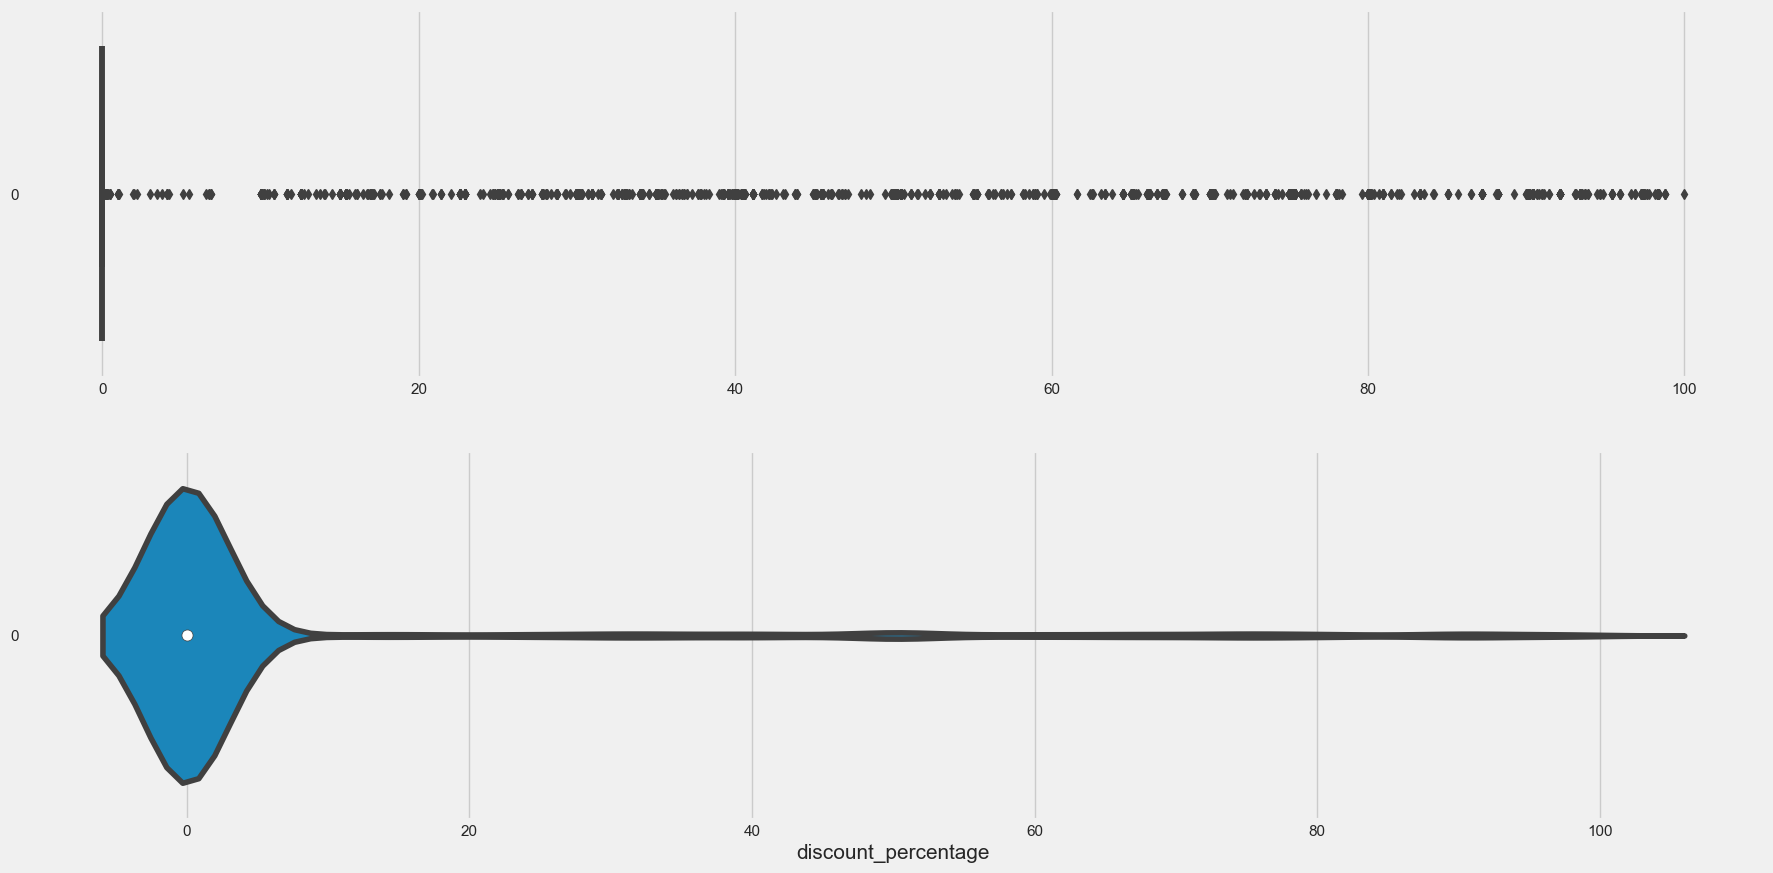

In [43]:
# Plots for original_price
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['original_price'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['original_price'], orient = "h", ax = axes[1])
axes[1].set_xlabel('original_price',fontsize=15)

# Plots for discount_price
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['discount_price'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['discount_price'], orient = "h", ax = axes[1])
axes[1].set_xlabel('discount_price',fontsize=15)

# Plots for discount_percentage
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['discount_percentage'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['discount_percentage'], orient = "h", ax = axes[1])
axes[1].set_xlabel('discount_percentage',fontsize=15)

### Relationship between `numerical predictors` and `all reviews`, and between numerical data and `recommend`

In [44]:
numericalgames.corr()

,all_reviews,original_price,discount_price,discount_percentage
all_reviews,1.000000,0.001006,0.018958,-0.035278
original_price,0.001006,1.000000,0.658805,0.417969
discount_price,0.018958,0.658805,1.000000,0.066322
discount_percentage,-0.035278,0.417969,0.066322,1.000000


<AxesSubplot:>

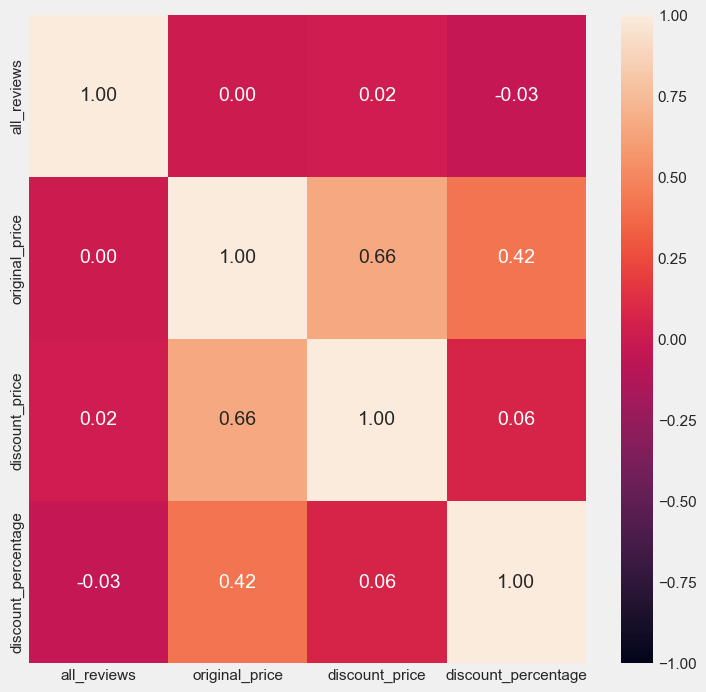

In [14]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(8,8))
sb.heatmap(numericalgames.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Based on the heatmap, the linear correlation between "all_reviews" and the other numerical variables appears to be extremely low, with all correlations falling below 0.03, and "discount_percentage" displaying the highest correlation at 0.03. These results suggest that there is a poor linear relationship between these variables and "all_reviews." However, it is possible that non-linear relationships exist between these variables. Therefore, we shall also explore non-linear models.

<AxesSubplot:xlabel='discount_percentage', ylabel='recommend'>

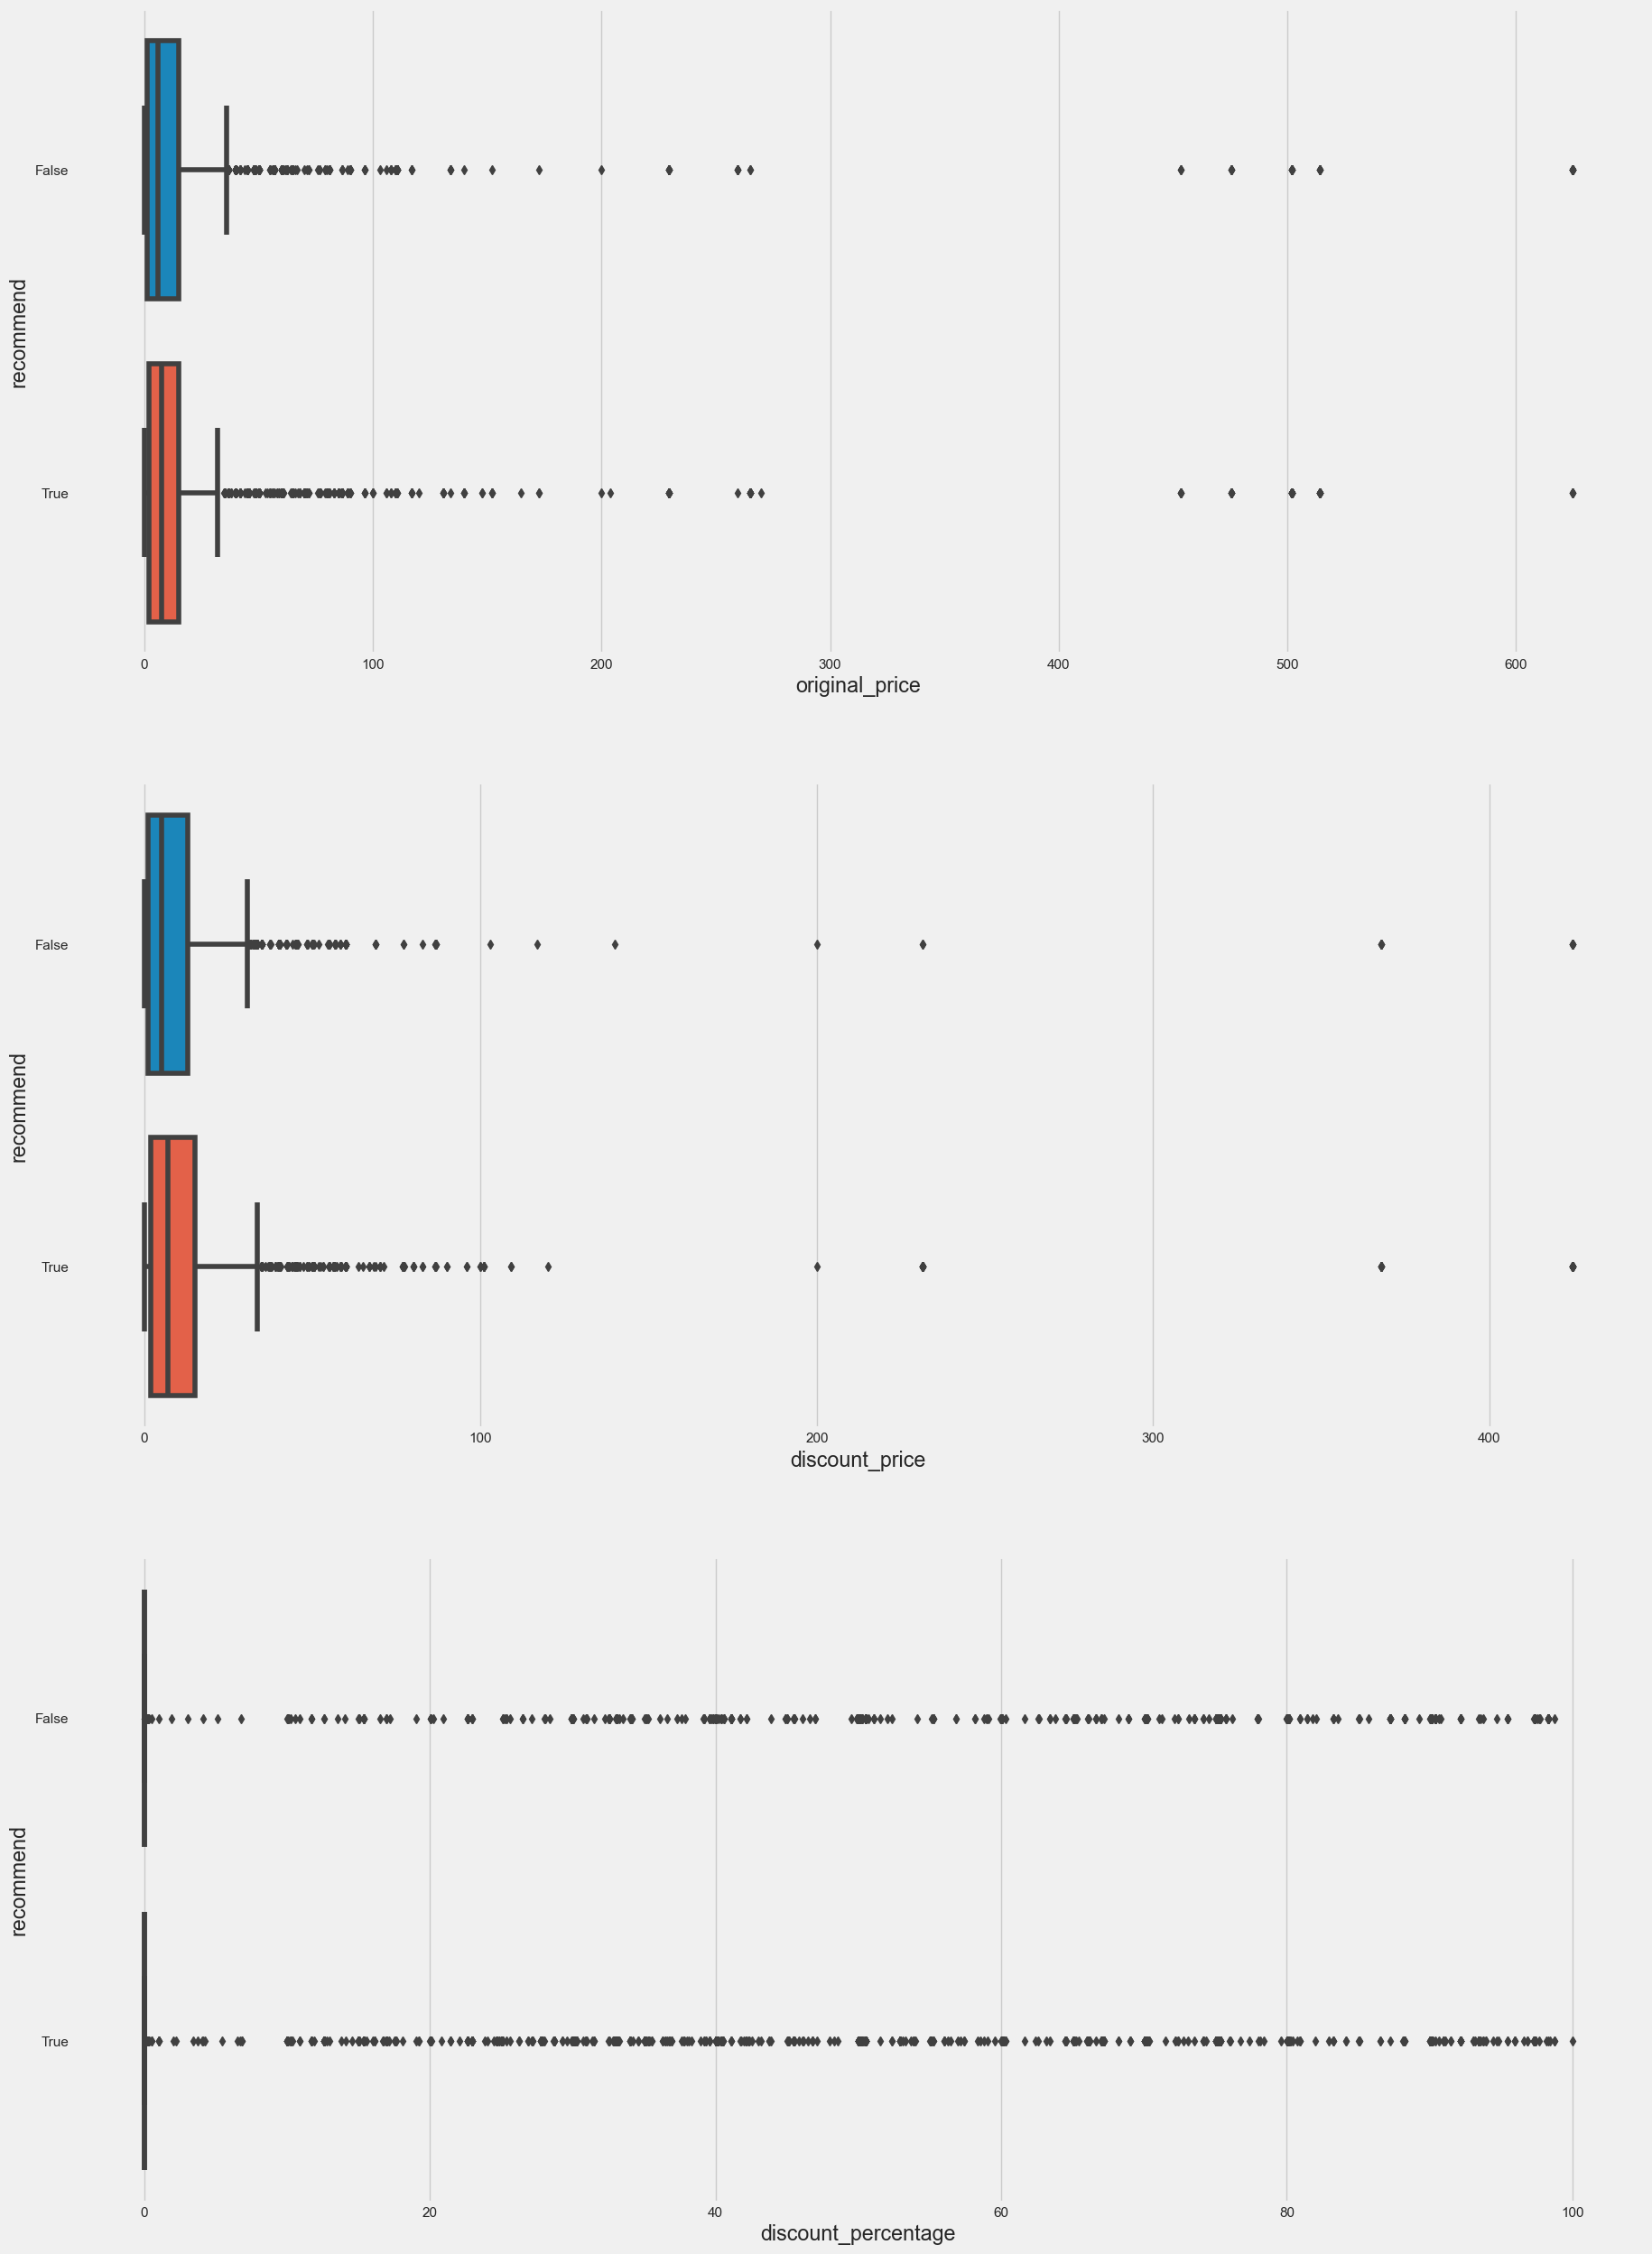

In [38]:
# Numerical predictors vs Recommend

f, axes = plt.subplots(3,1,figsize=(20,30))

# Original Price vs Recommend
sb.boxplot(x= 'original_price', y = 'recommend', data = games, orient = 'h', ax = axes[0])

# Discount Price vs Recommend
sb.boxplot(x= 'discount_price', y = 'recommend', data = games, orient = 'h', ax = axes[1])

# Discount Percentage vs Recommend
sb.boxplot(x= 'discount_percentage', y = 'recommend', data = games, orient = 'h', ax = axes[2])

# Categorical data

In [67]:
categorical_games = games[[
 'recommend', 'mature_content', 
 'genre_Action',
 'genre_Adventure',
 'genre_Casual',
 'genre_Massively Multiplayer',
 'genre_RPG',
 'genre_Racing',
 'genre_Simulation',
 'genre_Sports',
 'genre_Strategy',
 'developer', 'publisher']]
categorical_games.head()

,recommend,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,developer,publisher
0,True,False,1,0,0,0,0,0,0,0,0,id Software,"Bethesda Softworks,Bethesda Softworks"
1,False,True,1,1,0,1,0,0,0,0,0,PUBG Corporation,"PUBG Corporation,PUBG Corporation"
2,True,False,1,1,0,0,0,0,0,0,1,Harebrained Schemes,"Paradox Interactive,Paradox Interactive"
3,False,False,1,1,0,1,0,0,0,0,0,Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive"
4,True,False,1,0,0,1,1,0,0,0,1,CCP,"CCP,CCP"


### Mature content

<Figure size 1200x300 with 0 Axes>

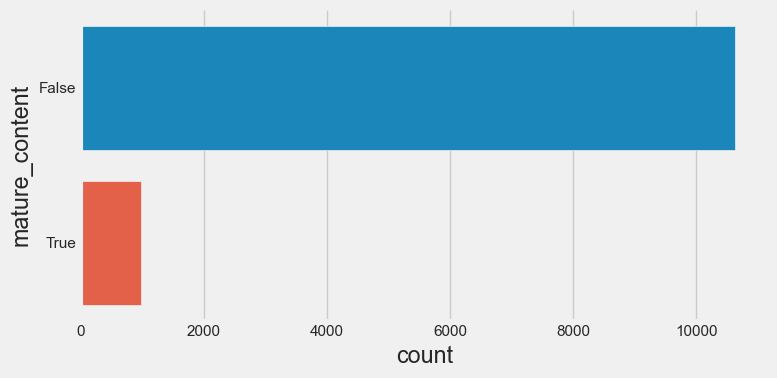

In [70]:
# Mature content 
f = plt.figure(figsize=(12, 3))
sb.catplot(y = "mature_content", data = categorical_games, kind = "count", height = 4, aspect = 2) 

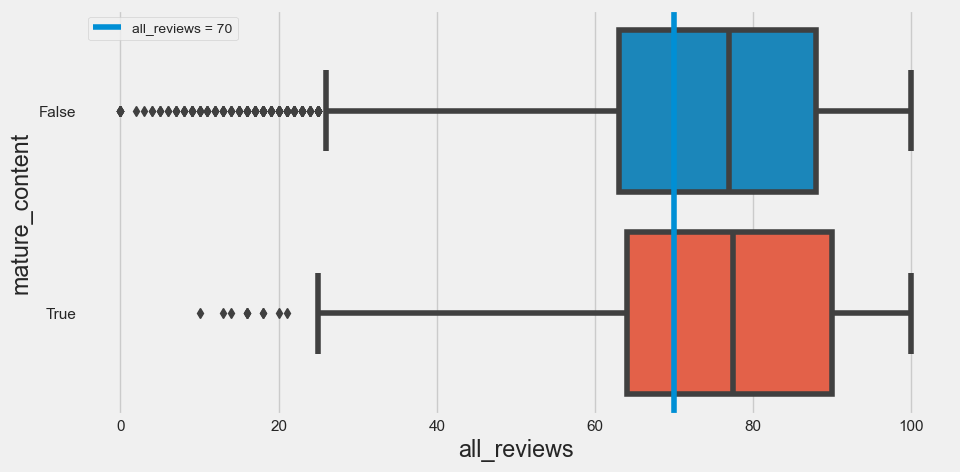

In [73]:
# Mature content vs all reviews

f = plt.figure(figsize=(10, 5))
sb.boxplot(x = "all_reviews", y = "mature_content", data = games, orient = "h", width = 0.8)
plt.axvline(70, label= "all_reviews = 70")
plt.legend(fontsize=10)
plt.show()

<AxesSubplot:xlabel='mature_content', ylabel='recommend'>

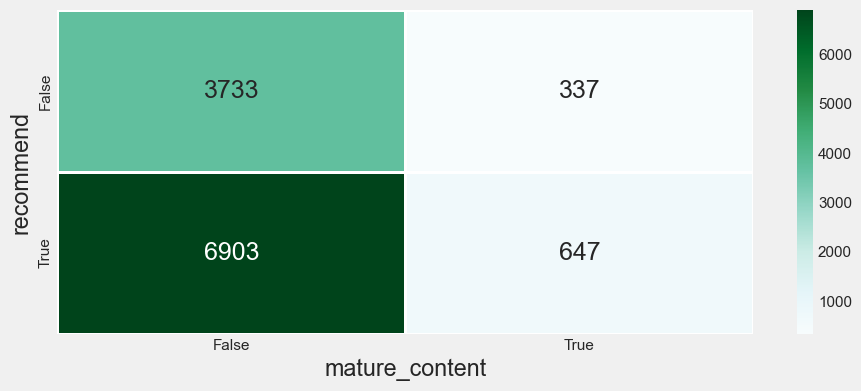

In [74]:
# Mature content vs Recommend
f = plt.figure(figsize=(10, 4))
sb.heatmap(categorical_games.groupby(['recommend', 'mature_content']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### Genre

In [75]:
# All genre 
allgenre = categorical_games.filter(regex='^genre_')
print("Dimension of allgenre: ", allgenre.shape)


Dimension of allgenre:  (11620, 9)


In [76]:
list(allgenre)

['genre_Action',
 'genre_Adventure',
 'genre_Casual',
 'genre_Massively Multiplayer',
 'genre_RPG',
 'genre_Racing',
 'genre_Simulation',
 'genre_Sports',
 'genre_Strategy']

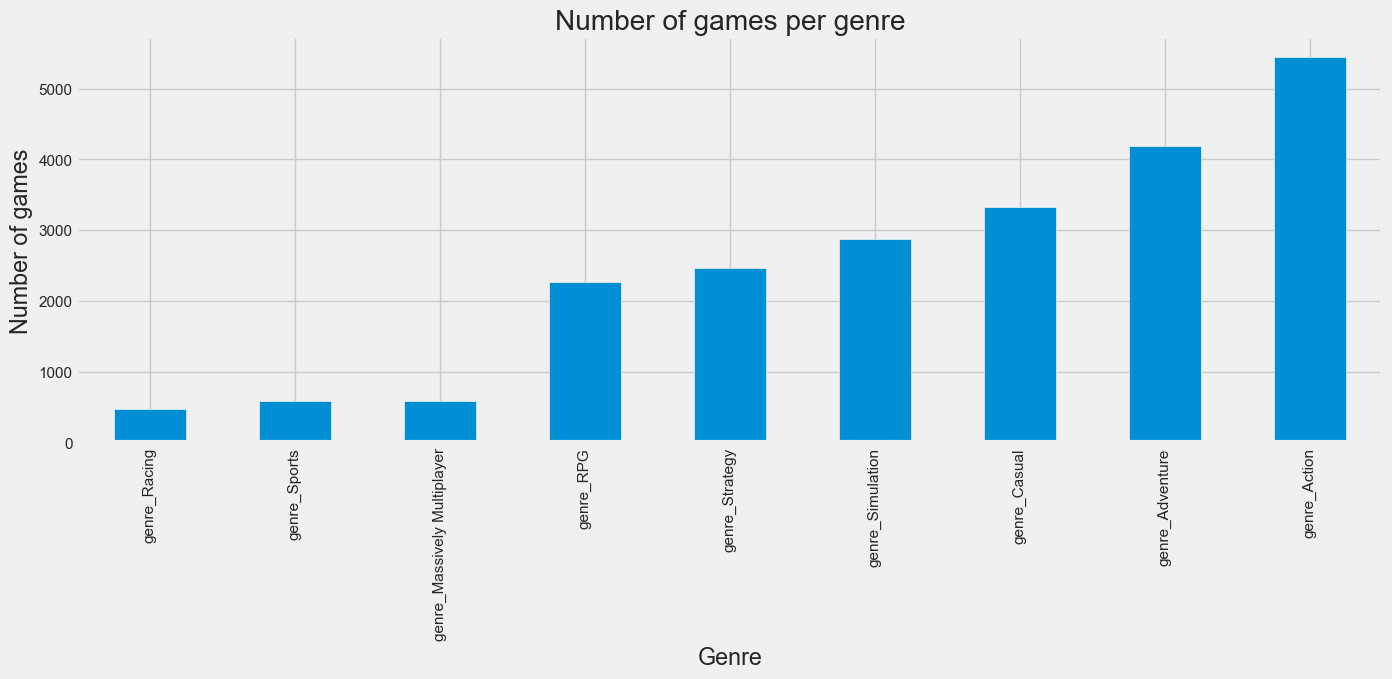

In [77]:
# All genre 
allgenre_sum_sorted = allgenre.sum().sort_values()

# create a bar chart
fig, ax = plt.subplots(figsize=(15, 5))
allgenre_sum_sorted.plot(kind='bar', ax=ax)

# set plot labels
ax.set_title('Number of games per genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of games')

# show the plot
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)
C:\ProgramData\Anaconda3\lib\site-

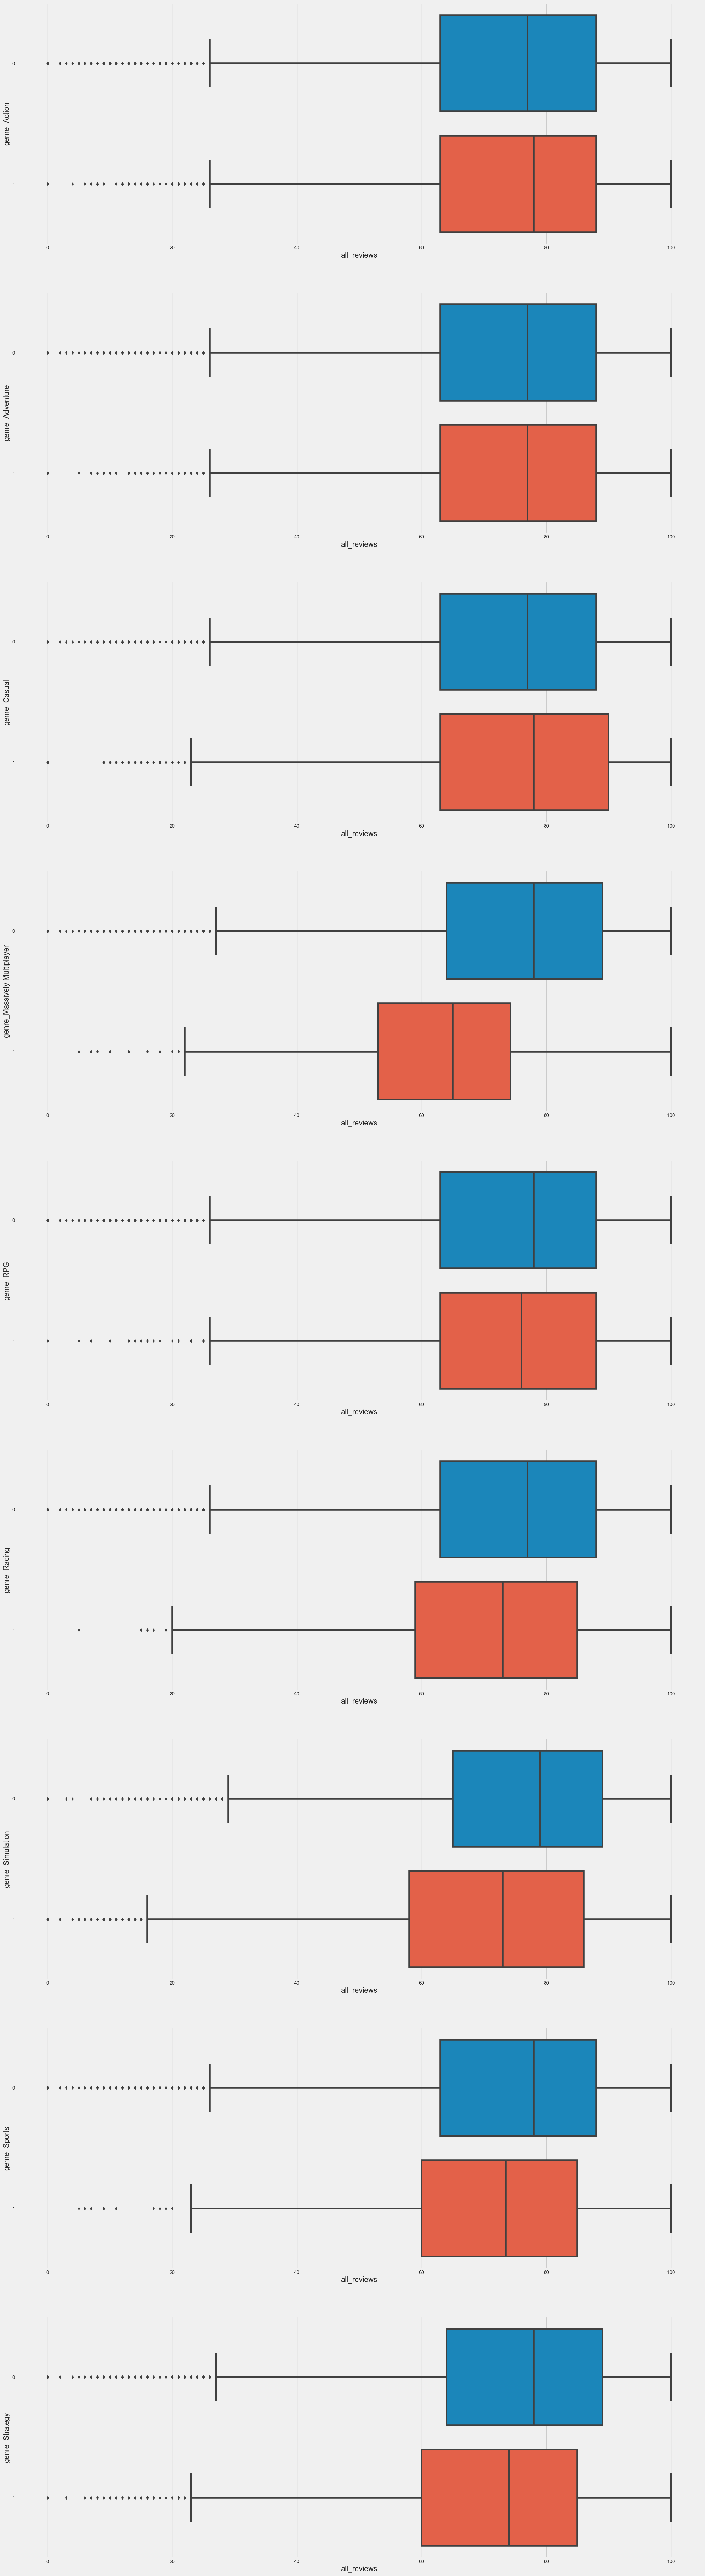

In [28]:
# All genre vs all reviews

# Concatenate all genre with all reviews
genre_reviews = pd.concat([allgenre, pd.DataFrame(games['all_reviews'])], axis = 1)

f, axes = plt.subplots(9, 1, figsize=(25, 100))

i=0
for thegenre in allgenre:
    sb.boxplot(x = "all_reviews", y = thegenre , data = genre_reviews, orient = "h", width = 0.8, ax = axes[i])
    i+=1




<AxesSubplot:>

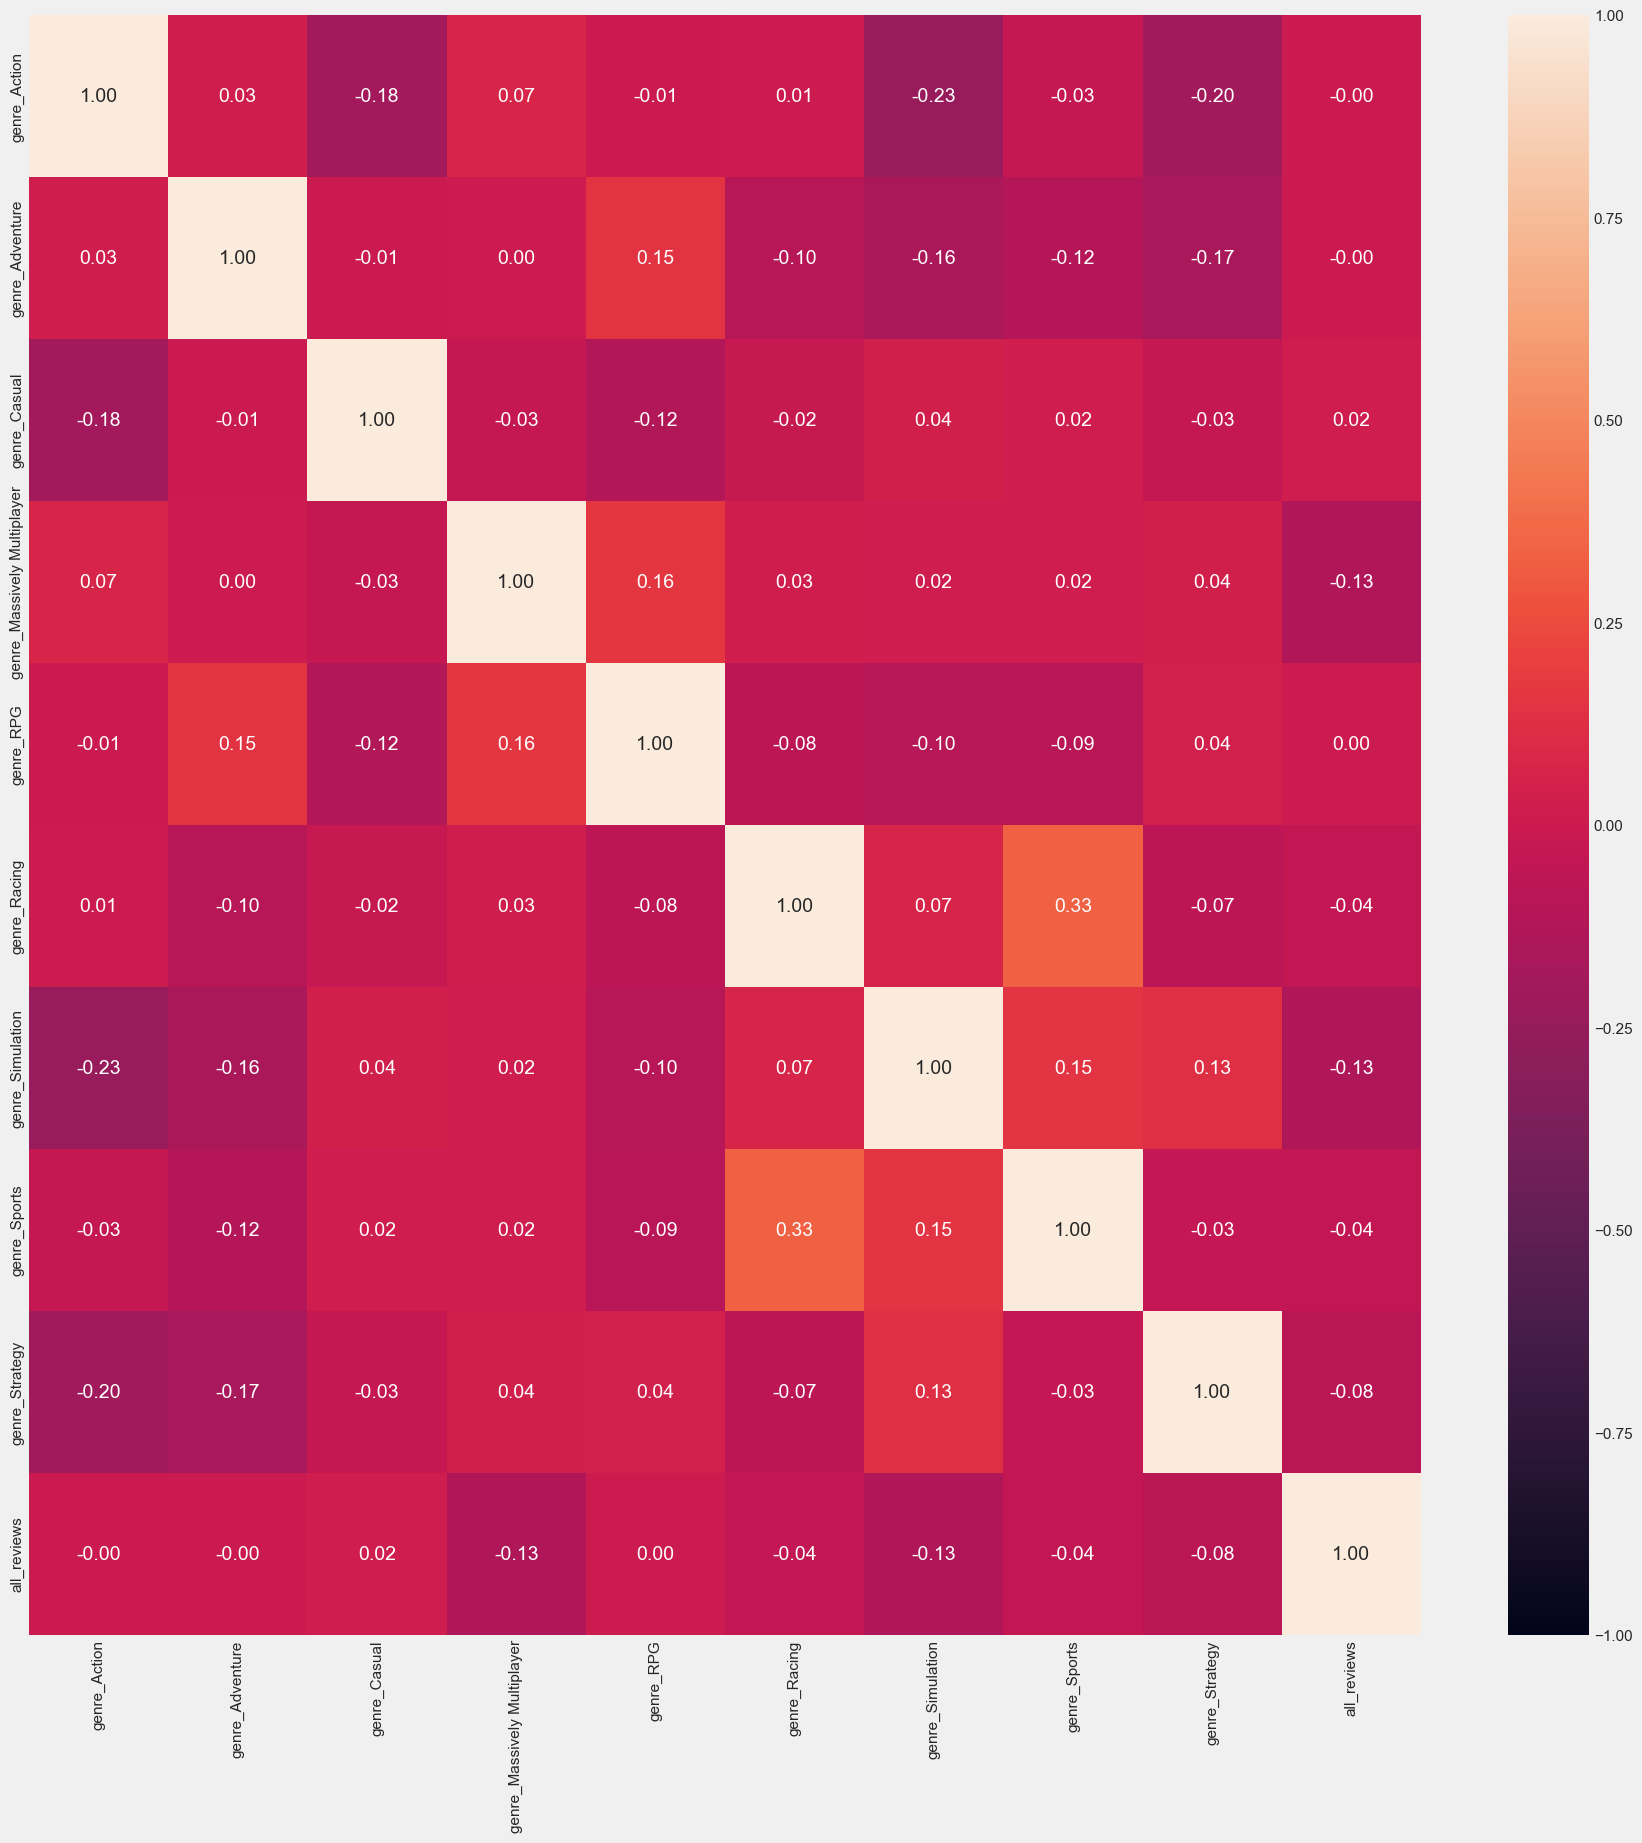

In [29]:
# All genre vs all reviews - correlation (treating genre as numerical variables, as a result of one-hot encoding)

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20,20))
sb.heatmap(genre_reviews.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

From the heatmap, `genre_Simulation` and `genre_Massively Multiplayer` have the `highest negative correlation (-0.13)` with all_reviews. In genral, there is no strong correlation between genre and all reviews. However, there are still some chances that the different combination of genre may result in a stronger correlation.

### Languages

In [60]:
# Drop some inappropriate languages

#games = games.drop(['languages_#lang_#lang_#lang_english**#lang_full_audio*#lang_full_audio', 
  #                 'languages_#lang_#lang_spanish*#lang_full_audio', 
    #               'languages_#lang_german;',
   #                'languages_(all with full audio support)'], axis = 1)

In [61]:
# All languages
#alllanguages = games.filter(regex='^languages_')
#print("Number of languages: ", alllanguages.shape[1])

#alllanguages.head()

In [62]:
# All languages

#alllanguages_sum_sorted = alllanguages.sum().sort_values()

# create a bar chart
#fig, ax = plt.subplots(figsize=(15, 5))
#alllanguages_sum_sorted.plot(kind='bar', ax=ax)

# set plot labels
#ax.set_title('Number of games per language')
#ax.set_xlabel('languages')
#ax.set_ylabel('Number of games')

# show the plot
plt.show()

In [63]:
# All languages vs all reviews

# Concatenate all genre with all reviews

#languages_reviews = pd.concat([alllanguages, pd.DataFrame(games['all_reviews'])], axis = 1)

#f, axes = plt.subplots(30, 1, figsize=(20, 100))

#i=0
#for thelanguage in alllanguages:
   # sb.boxplot(x = "all_reviews", y = thelanguage , data = languages_reviews, orient = "h", width = 0.8, ax = axes[i])
  #  i+=1
    


Every language seems to have low relation with all_reviews. 

### Developer

In [80]:
categorical_games['developer'].value_counts()

Dovetail Games                77
KOEI TECMO GAMES CO., LTD.    58
Choice of Games               56
SCS Software                  42
CAPCOM Co., Ltd.              33
                              ..
Shadow Planet Productions      1
Shawn Beck                     1
cbritez                        1
Apparition Games               1
Phoesion                       1
Name: developer, Length: 7631, dtype: int64

There are many different developer found in this dataset, so we will only be looking at developer who had developed at least 30 games so that it would be at least follow a normal distribution via central limit theorem.

In [84]:
(categorical_games['developer'].value_counts() >= 30).sum()

7

In [87]:
value_counts = categorical_games['developer'].value_counts()
to_change = value_counts[value_counts >= 30].index

moredeveloper = games[games['developer'].isin(to_change)]
moredeveloper['developer'].value_counts()

Dovetail Games                77
KOEI TECMO GAMES CO., LTD.    58
Choice of Games               56
SCS Software                  42
CAPCOM Co., Ltd.              33
Arc System Works              31
RewindApp                     30
Name: developer, dtype: int64

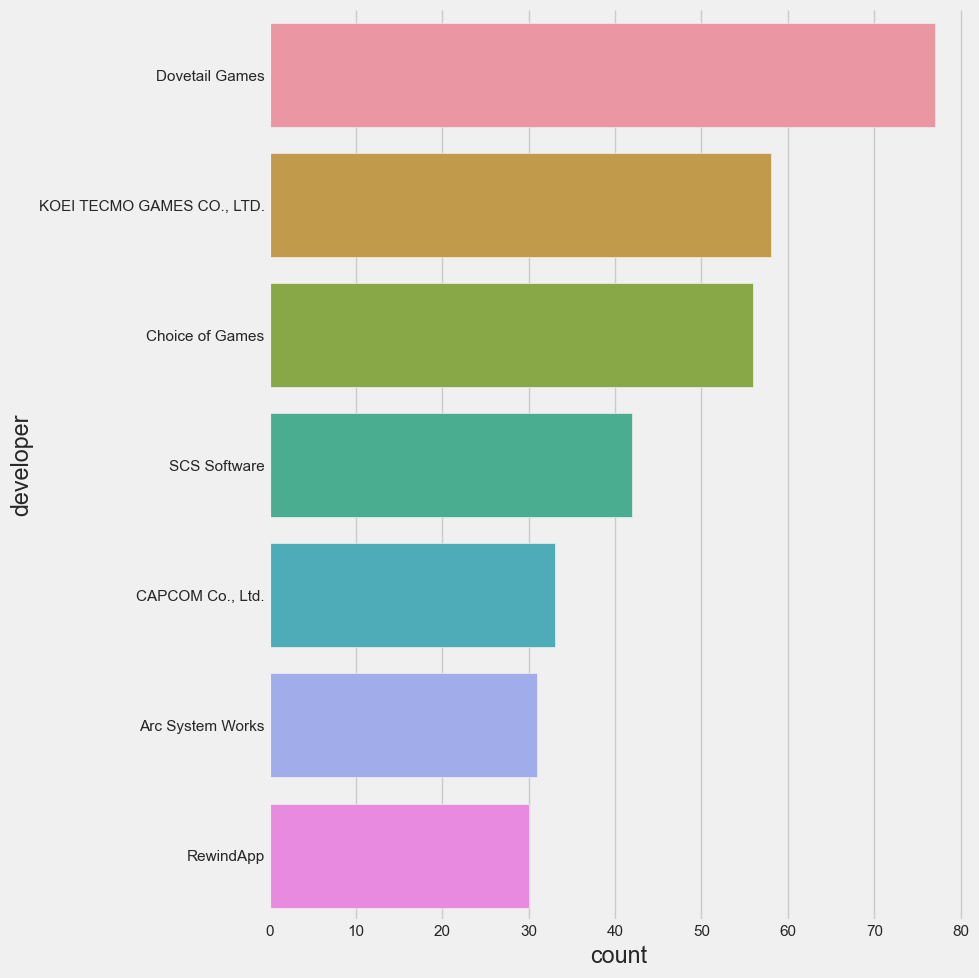

In [88]:
sb.catplot(y = "developer", data = moredeveloper, kind = "count", order = moredeveloper['developer'].value_counts().index, height = 10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


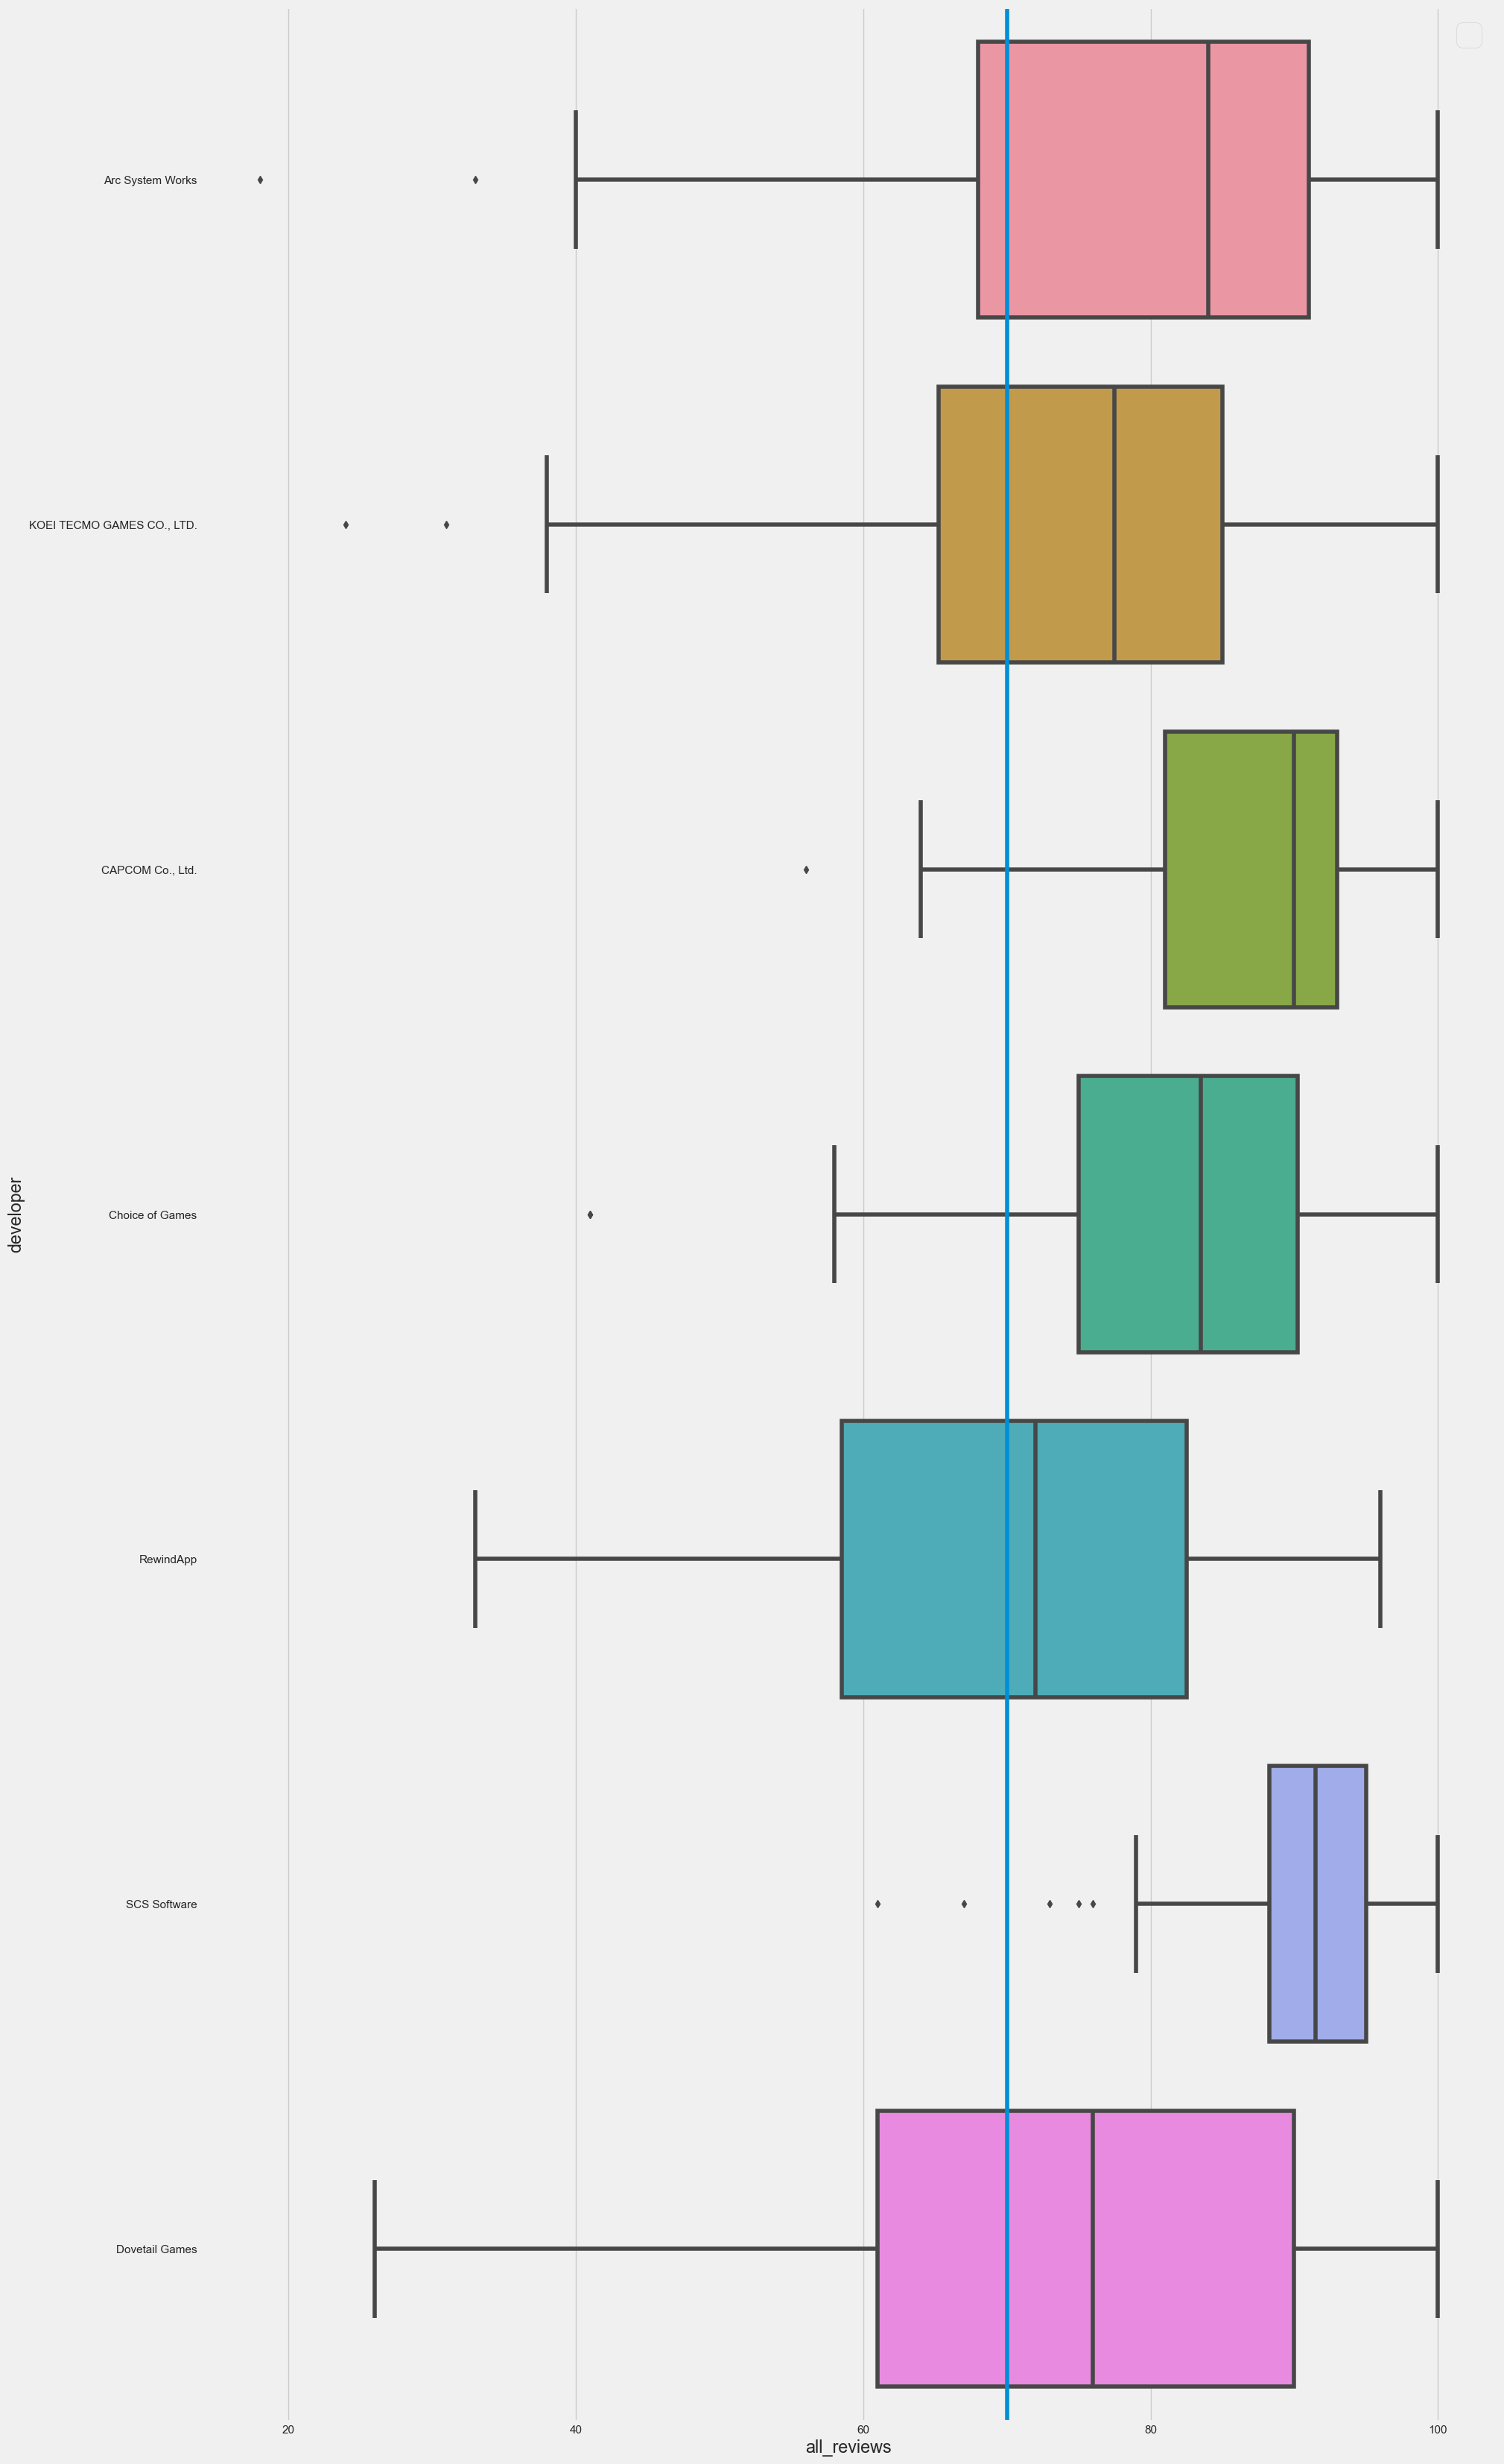

In [89]:
# Developer vs All reviews

f = plt.figure(figsize=(20, 40))
sb.boxplot(x = "all_reviews", y = "developer", data = moredeveloper, orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("all_reviews",fontsize=30)
ax.set_ylabel("developer",fontsize=30)
plt.legend(fontsize=30)
plt.axvline(70, label= "good = 70")
plt.show()

From the data, we see that the SCS Software developer's 25 percentile, median, 75 percentile all_reviews are the highest compared to others 25 percentile, median, 75 percentile all_reviews. 


### Publisher

In [90]:
print("Number of unique publisher: ", games['publisher'].nunique())
print("Number of unique publisher who published more than 30 games: ", (games['publisher'].value_counts() >=30).sum())

Number of unique publisher:  6443
Number of unique publisher who published more than 30 games:  28


There are many different `publisher` found in this dataset, it is difficult to show all publishers at here. Thus, we will only be looking at publisher who had published at `least 30` games so that it would be at least follow a normal distribution via central limit theorem.

In [91]:
value_counts = games['publisher'].value_counts()
to_change = value_counts[value_counts >= 30].index
morepublisher = games[games['publisher'].isin(to_change)]

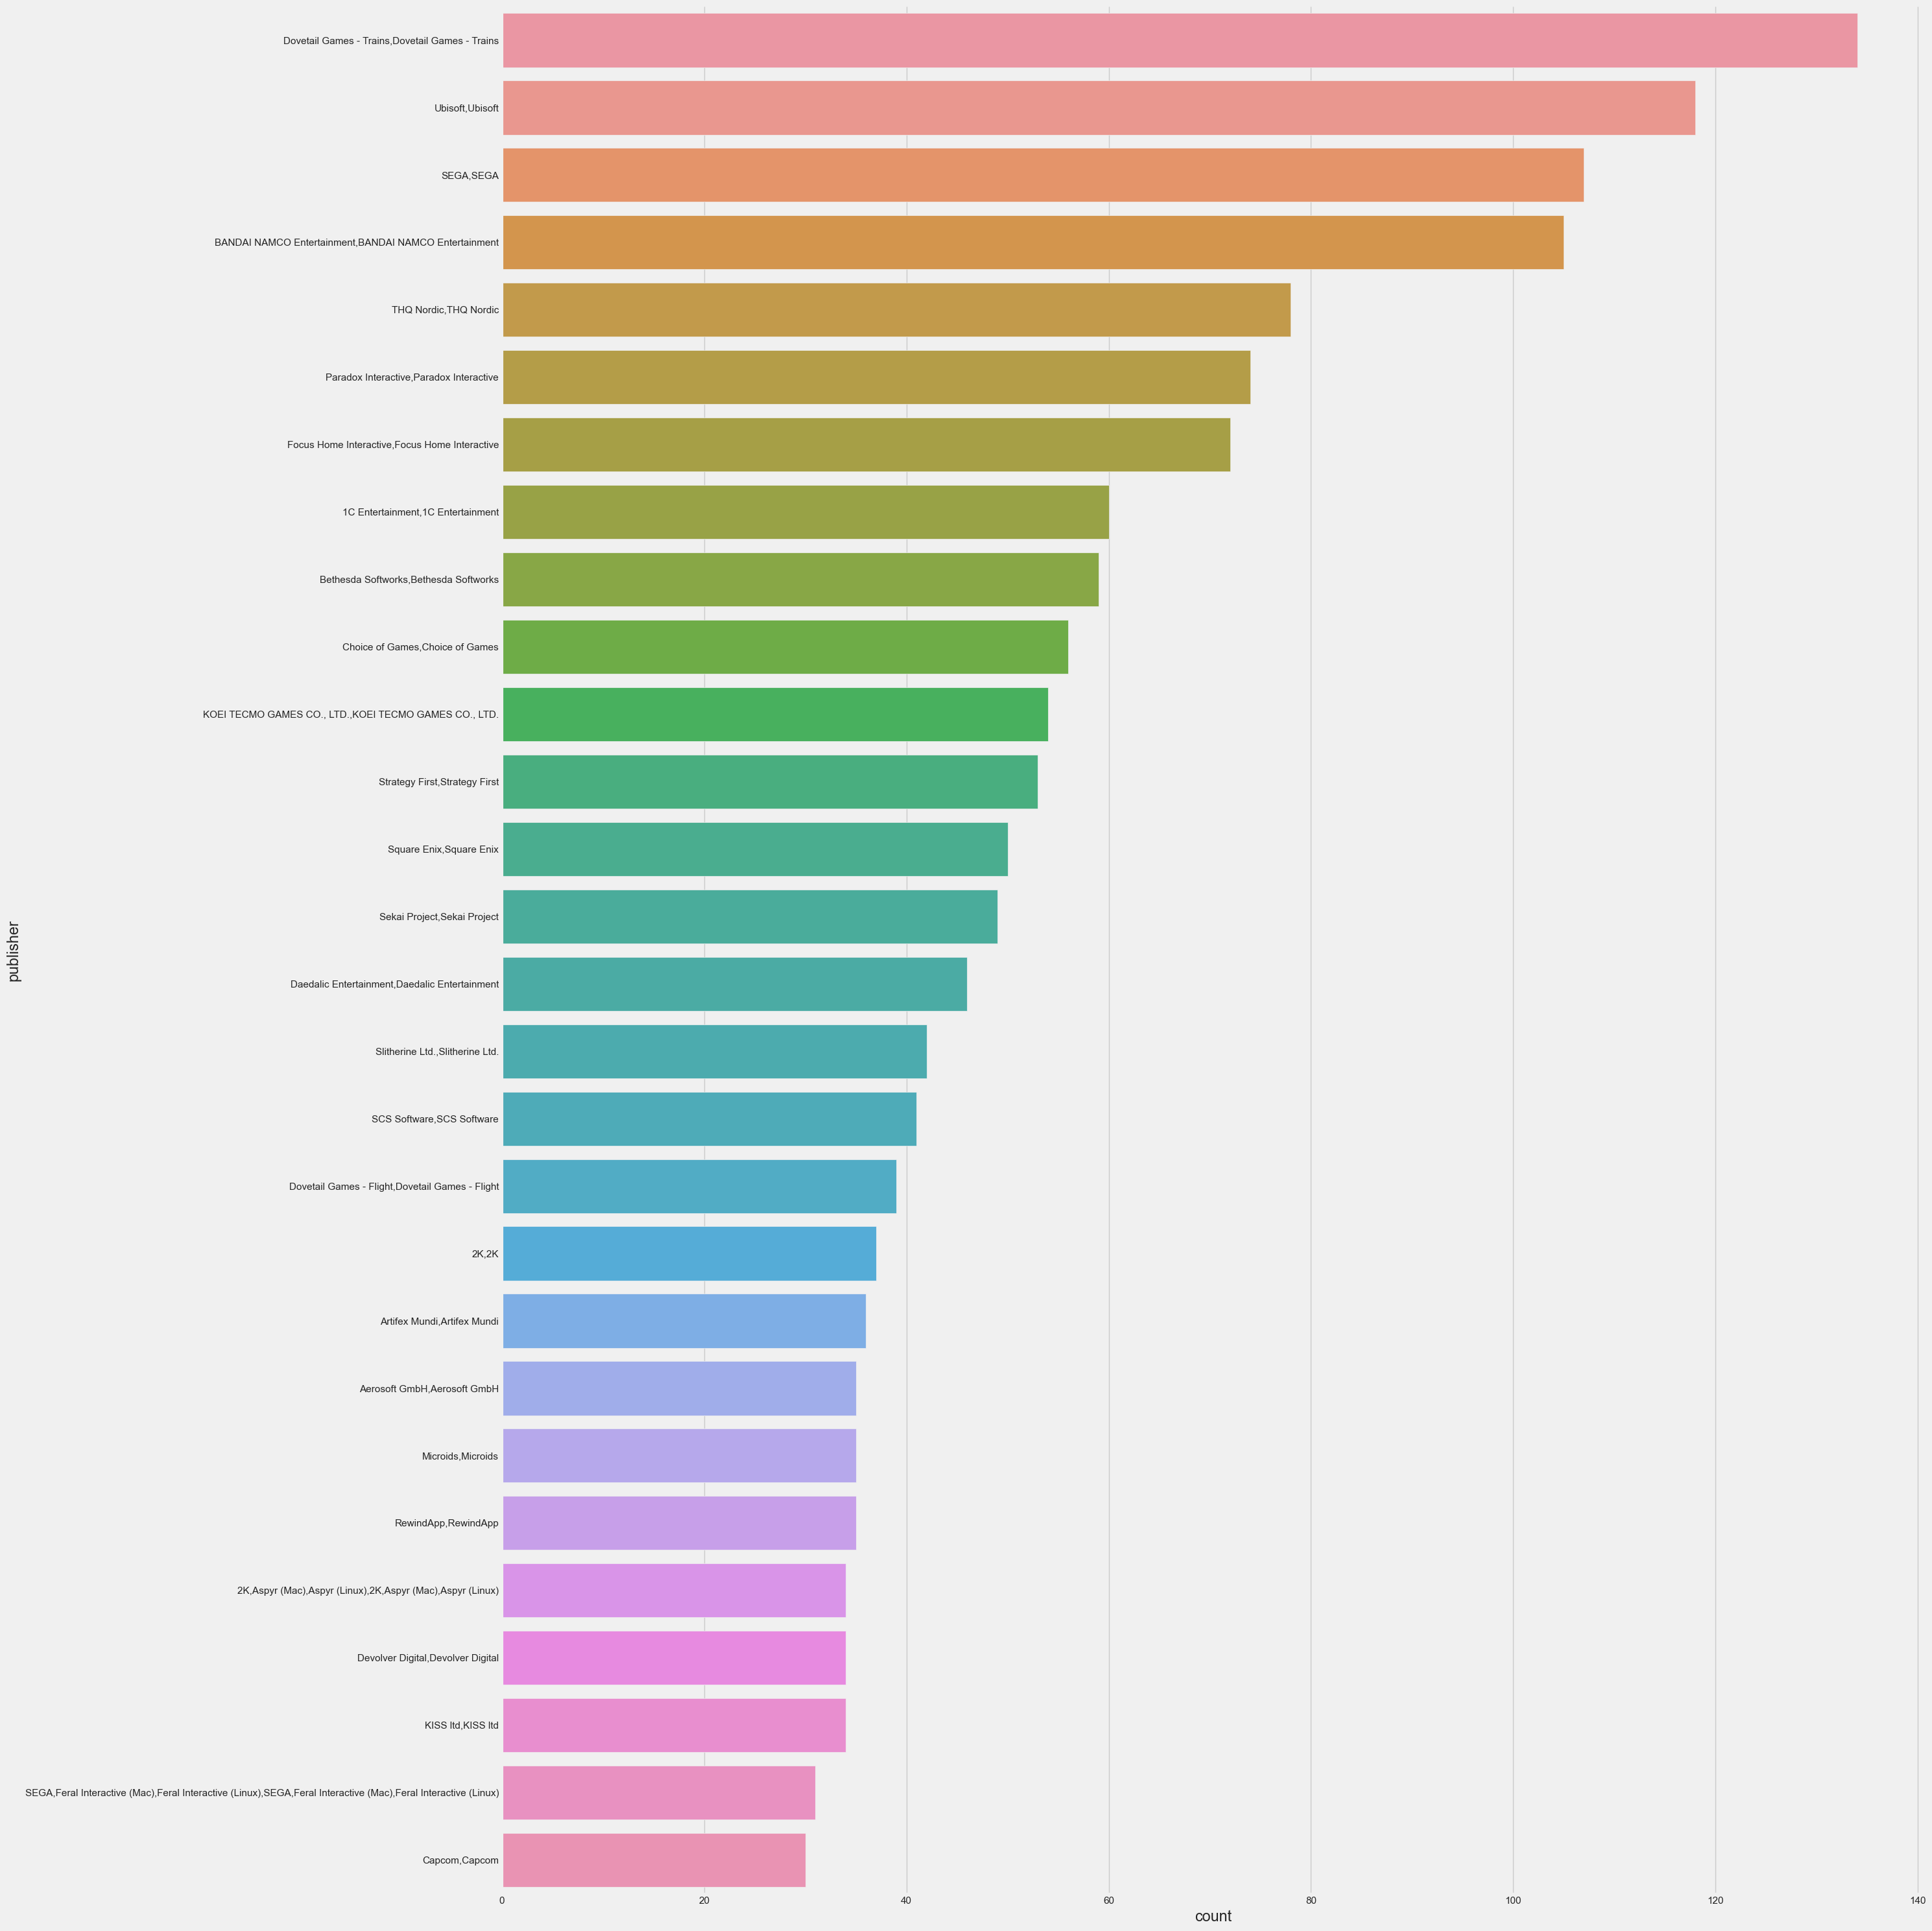

In [92]:
# Publisher

sb.catplot(y = "publisher", data = morepublisher, kind = "count", order = morepublisher['publisher'].value_counts().index, height = 30)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


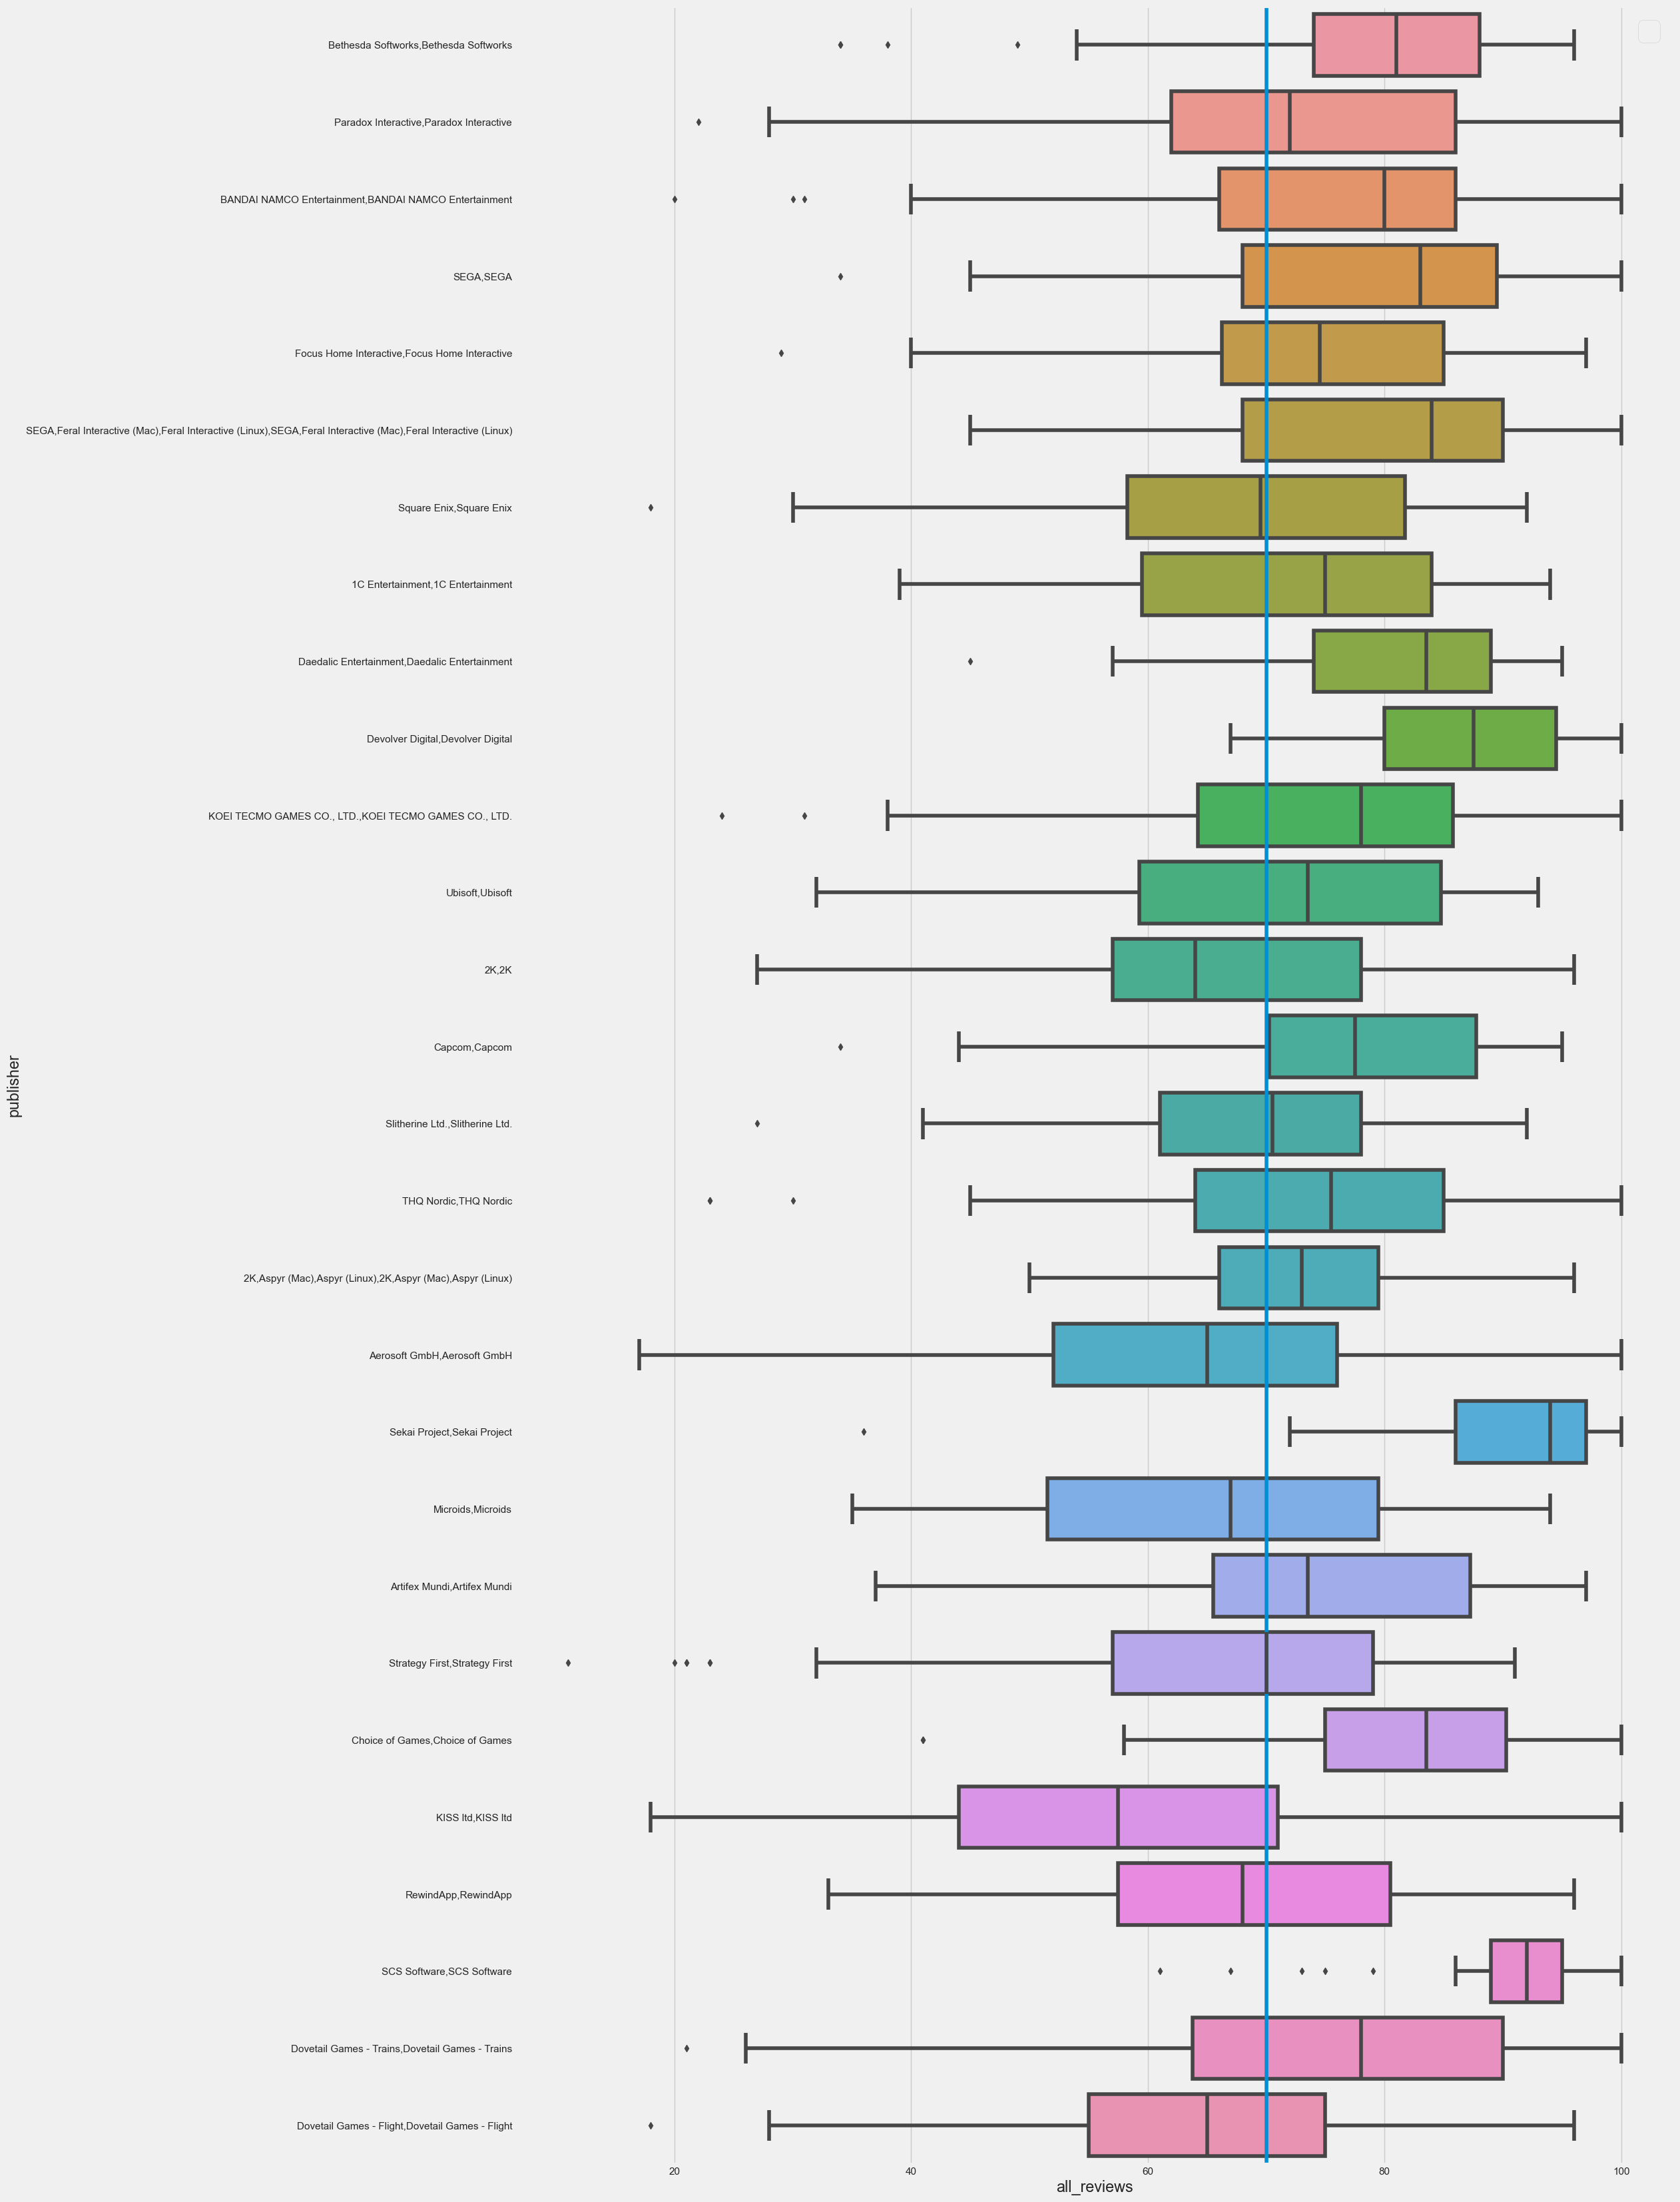

In [93]:
# Publisher vs all reviews

f = plt.figure(figsize=(20, 40))
sb.boxplot(x = "all_reviews", y = "publisher", data = morepublisher, orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("all_reviews",fontsize=30)
ax.set_ylabel("Publisher",fontsize=30)
plt.legend(fontsize=30)
plt.axvline(70, label= "good = 70")
plt.show()

From the data, we observe that the Sekai Project and SCS Software publishers have one of the highest (25 percentile, median, and 75 percentile) all_reviews, KISS Itd and Aerosoft GmbH have one of the lowest (25 percentile, median, and 75 percentile) all_reviews.